In [4]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import typing
import sklearn
import nltk

In [38]:
import glob
import json
import os
from tqdm import tqdm

def fix_model_name_formatting(folder_path):
    """
    Fix the formatting in RF model JSON files by adding a comma between min_samples_leaf and bootstrap.
    
    Args:
        folder_path (str): Path to the folder containing JSON files
    """
    # Find all RF JSON files
    json_files = glob.glob(os.path.join(folder_path, "**/*RF*.json"), recursive=True)
    print(json_files)
    # Initialize counters
    fixed_count = 0
    error_count = 0
    
    # Create progress bar
    for file_path in tqdm(json_files, desc="Processing files"):
        try:
            # Read the JSON file
            with open(file_path, 'r') as f:
                data = json.load(f)
            
            # Check if this is an RF model file with the formatting issue
            if ('model_name' in data and 
                'RF' in data['model_name'] and 
                'min_samples_leaf' in data['model_name'] and 
                'bootstrap' in data['model_name']):
                
                # Fix the formatting
                model_name = data['model_name']
                if ' bootstrap=' in model_name:
                    # Add comma before bootstrap
                    fixed_name = model_name.replace(' bootstrap=', ' ,bootstrap=')
                    
                    # Update the model_name in the data
                    data['model_name'] = fixed_name
                    
                    # Write the corrected data back to the file
                    with open(file_path, 'w') as f:
                        json.dump(data, f, indent=4)
                    
                    fixed_count += 1
                    
        except Exception as e:
            print(f"\nError processing {file_path}: {str(e)}")
            error_count += 1

    # Print summary
    print(f"\nProcessing complete:")
    print(f"Total files processed: {len(json_files)}")
    print(f"Files fixed: {fixed_count}")
    print(f"Errors encountered: {error_count}")


In [40]:

# Usage
folder_path = "output_results_holdout"  # Replace with your folder path
fix_model_name_formatting(folder_path)

['output_results_holdout/output_results/congressional_voting/RF (n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4 bootstrap=False,max_features=log2,criterions=entropy,class_weights=balanced)/RF (n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4 bootstrap=False,max_features=log2,criterions=entropy,class_weights=balanced)_metrics.json', 'output_results_holdout/output_results/congressional_voting/RF (n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=1 bootstrap=False,max_features=log2,criterions=gini,class_weights=balanced)/RF (n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=1 bootstrap=False,max_features=log2,criterions=gini,class_weights=balanced)_metrics.json', 'output_results_holdout/output_results/congressional_voting/RF (n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1 bootstrap=False,max_features=log2,criterions=entropy,class_weights=balanced_subsample)/RF (n_estimators=100,

Processing files: 100%|██████████| 3388/3388 [01:05<00:00, 51.34it/s] 


Processing complete:
Total files processed: 3388
Files fixed: 3388
Errors encountered: 0


In [37]:

import glob
import os
model_prefix = "RF"
folder_path = os.path.join('CV','CV','output_results', 'amazon_reviews','**/*RF*.json')
#full_path = '*'+os.path.join(folder_path, f'{model_prefix}*.json')
full_path = folder_path
print(full_path)
glob.glob(full_path, recursive=True)

CV/CV/output_results/amazon_reviews/**/*RF*.json


['CV/CV/output_results/amazon_reviews/RF (n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4 bootstrap=False,max_features=log2,criterions=entropy,class_weights=balanced)/RF (n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4 bootstrap=False,max_features=log2,criterions=entropy,class_weights=balanced)_metrics.json',
 'CV/CV/output_results/amazon_reviews/RF (n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=1 bootstrap=False,max_features=log2,criterions=gini,class_weights=balanced)/RF (n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=1 bootstrap=False,max_features=log2,criterions=gini,class_weights=balanced)_metrics.json',
 'CV/CV/output_results/amazon_reviews/RF (n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1 bootstrap=False,max_features=log2,criterions=entropy,class_weights=balanced_subsample)/RF (n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1 bootstrap=Fal

In [ ]:
# import glob
# import os
# from pathlib import Path

# # Print current working directory
# print("Current working directory:", os.getcwd())

# # Print the exact pattern you're using
# pattern = os.path.join('test_output_results', '**/*RF*.json')
# print("Search pattern:", pattern)

# # Print all files in the directory (recursive)
# print("\nAll files in directory:")
# for file in Path('.').rglob('*'):
#     print(file)

# # Try different glob patterns
# print("\nTrying different patterns:")

# # Pattern 1: Basic search
# files1 = glob.glob("*RF*.json")
# print("\nPattern '*RF*.json':", files1)

# # Pattern 2: With full path
# files2 = glob.glob(os.path.join(os.getcwd(), "**/*RF*.json"), recursive=True)
# print("\nPattern with full path:", files2)

# # Pattern 3: Using pathlib
# files3 = list(Path('.').rglob('*RF*.json'))
# print("\nUsing pathlib:", files3)

# # Pattern 4: Specific directory
# files4 = glob.glob(os.path.join('test_output_results', '*RF*.json'))
# print("\nSpecific directory:", files4)

Current working directory: /home/pw98/repos/uni/01/machine-learning/ds-ml-project
Search pattern: test_output_results/**/*RF*.json

All files in directory:
all-in-all.ipynb
config
tests
output_results-20241119T202836Z-001.zip
old
anal-itycs.ipynb
report.md
.gitignore
.git
output_results
data
notebooks
rf.ipynb
output_results-20241119T202836Z-001.zip:Avecto.Zone.Identifier
output_results-20241119T202836Z-001.zip:Zone.Identifier
output_results-20241119T202836Z-001.zip:PG$Secure
run_all_experiments.sh
test_output_results
output_results_all
src
requirements.txt
.venv
README.md
config/config.yaml
tests/__init__.py
tests/test_data_processing.py
tests/test_models.py
tests/test_evaluation.py
old/svm_classifier.py
old/create_repo_structure.py
old/todos.ipynb
old/todos.md
old/experiment-template.ipynb
old/exercise00.ipynb
.git/branches
.git/config
.git/COMMIT_EDITMSG
.git/index
.git/refs
.git/logs
.git/packed-refs
.git/info
.git/objects
.git/HEAD
.git/FETCH_HEAD
.git/hooks
.git/ORIG_HEAD
.git/de

In [50]:
import glob
import json
import os
import pandas as pd

#    accuracy  precision_weighted  recall_weighted  f1_weighted  accuracy_std  precision_weighted_std  recall_weighted_std  f1_weighted_std  model_name     dataset_name_name
# 0  0.900880         0.938316        0.900880     0.908401      0.021403             0.007927           0.021403         0.018926        RF (n_estimators=20...)  amazon_review
# 1  0.915234         0.945123        0.915234     0.925678      0.019876             0.008234           0.019876         0.017654        RF (n_estimators=30...)  amazon_review

def read_json_files_to_df(folder_path, dataset_name, model_prefix):
    # Get all JSON files that start with the model prefix
    checked_path = os.path.join(folder_path, f"**/{model_prefix}*.json")
    json_files = glob.glob(checked_path, recursive=True)
    print(f"For: {checked_path} found:{len(json_files)}")
    # List to store data from all files
    data_list = []
    
    for file in tqdm(json_files, desc=f"Processing {model_prefix}-{dataset_name} files"):
        with open(file, 'r') as f:
            data = json.load(f)
            data['dataset'] = dataset_name
            data_list.append(data)
    
    # Create DataFrame from the list of dictionaries
    df = pd.DataFrame(data_list)
    
    return df



In [52]:
svc_data = pd.concat([
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'amazon_reviews'),'amazon_reviews','SVC'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'congressional_voting'),'congressional_voting','SVC'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'traffic_prediction'),'traffic_situation','SVC'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'wine_reviews'),'wine_reviews','SVC'),
    ])


For: output_results_holdout/output_results/amazon_reviews/**/SVC*.json found:52


Processing SVC-amazon_reviews files: 100%|██████████| 52/52 [00:00<00:00, 139.47it/s]


For: output_results_holdout/output_results/congressional_voting/**/SVC*.json found:52


Processing SVC-congressional_voting files: 100%|██████████| 52/52 [00:00<00:00, 2061.69it/s]


For: output_results_holdout/output_results/traffic_prediction/**/SVC*.json found:48


Processing SVC-traffic_situation files: 100%|██████████| 48/48 [00:00<00:00, 429.29it/s]


For: output_results_holdout/output_results/wine_reviews/**/SVC*.json found:52


Processing SVC-wine_reviews files: 100%|██████████| 52/52 [00:00<00:00, 53.37it/s]


In [45]:
rf_data = pd.concat([
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'amazon_reviews'),'amazon_reviews','RF'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'congressional_voting'),'congressional_voting','RF'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'traffic_prediction'),'traffic_situation','RF'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'wine_reviews'),'wine_reviews','RF'),
    ])


For: output_results_holdout/output_results/amazon_reviews/**/RF*.json found:
864


Processing RF-amazon_reviews files: 100%|██████████| 864/864 [00:06<00:00, 137.58it/s]


For: output_results_holdout/output_results/congressional_voting/**/RF*.json found:
864


Processing RF-congressional_voting files: 100%|██████████| 864/864 [00:00<00:00, 4441.78it/s]


For: output_results_holdout/output_results/traffic_prediction/**/RF*.json found:
796


Processing RF-traffic_situation files: 100%|██████████| 796/796 [00:02<00:00, 361.36it/s]


For: output_results_holdout/output_results/wine_reviews/**/RF*.json found:
864


Processing RF-wine_reviews files: 100%|██████████| 864/864 [00:04<00:00, 184.81it/s]


In [46]:
knn_data = pd.concat([
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'amazon_reviews'),'amazon_reviews','KNN'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'congressional_voting'),'congressional_voting','KNN'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'traffic_prediction'),'traffic_situation','KNN'),
    read_json_files_to_df(os.path.join('output_results_holdout', 'output_results', 'wine_reviews'),'wine_reviews','KNN'),
    ])


For: output_results_holdout/output_results/amazon_reviews/**/KNN*.json found:
126


Processing KNN-amazon_reviews files: 100%|██████████| 126/126 [00:00<00:00, 214.83it/s]


For: output_results_holdout/output_results/congressional_voting/**/KNN*.json found:
126


Processing KNN-congressional_voting files: 100%|██████████| 126/126 [00:00<00:00, 5664.15it/s]


For: output_results_holdout/output_results/traffic_prediction/**/KNN*.json found:
126


Processing KNN-traffic_situation files: 100%|██████████| 126/126 [00:00<00:00, 750.55it/s]


For: output_results_holdout/output_results/wine_reviews/**/KNN*.json found:
131


Processing KNN-wine_reviews files: 100%|██████████| 131/131 [00:00<00:00, 325.46it/s]


In [53]:
all_model_data = pd.concat([
        rf_data,
        knn_data,
        svc_data
    ])

In [63]:
def parse_model_parameters(df):
    """
    Parse model parameters from the 'model_name' column and create new columns for each parameter.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'model_name' column
    
    Returns:
        pd.DataFrame: DataFrame with additional columns for each parameter
    """
    # Create a copy of the dataframe and reset index
    df_copy = df.copy().reset_index(drop=True)
    
    def extract_params(model_name):
        # Extract the content between parentheses
        params_str = model_name[model_name.find("(")+1:model_name.find(")")]
        
        # Split the parameters
        params_list = params_str.split(',')
        
        # Create a dictionary to store parameters
        params_dict = {}
        
        # Extract model type (RF, SVM, or KNN)
        params_dict['model_type'] = model_name.split()[0]
        
        # Parse each parameter
        for param in params_list:
            param = param.strip()
            if '=' in param:
                key, value = param.split('=')
                key = key.strip()
                value = value.strip()
                
                # Convert to appropriate data type
                if value.lower() == 'true':
                    value = True
                elif value.lower() == 'false':
                    value = False
                elif value.isdigit():
                    value = int(value)
                elif value.replace('.', '').isdigit():
                    value = float(value)
                
                params_dict[f'{key}'] = value
                
        return params_dict
    
    # Apply the parsing function to each row and create a DataFrame
    params_df = pd.DataFrame([extract_params(name) for name in df_copy['model_name']])
    
    # Reset index of params_df to match df_copy
    params_df.index = df_copy.index
    
    # Drop any duplicate columns that might exist in both DataFrames
    common_cols = set(df_copy.columns) & set(params_df.columns)
    if common_cols:
        params_df = params_df.drop(columns=list(common_cols))
    
    # Combine the original DataFrame with the parameters DataFrame
    result_df = pd.concat([df_copy, params_df], axis=1)
    
    return result_df

# Usage:
try:
    # Print shape before parsing
    print("Original shapes:")
    print(f"SVC data shape: {svc_data.shape}")
    print(f"RF data shape: {rf_data.shape}")
    print(f"KNN data shape: {knn_data.shape}")
    
    # Parse each dataset
    svc_data = parse_model_parameters(svc_data)
    rf_data = parse_model_parameters(rf_data)
    knn_data = parse_model_parameters(knn_data)
    all_model_data = parse_model_parameters(all_model_data)

    print(svc_data.columns)
    print(rf_data.columns)
    print(knn_data.columns)
    print(all_model_data.columns)
    
    # Print shape after parsing
    print("\nNew shapes:")
    print(f"SVC data shape: {svc_data.shape}")
    print(f"RF data shape: {rf_data.shape}")
    print(f"KNN data shape: {knn_data.shape}")
    
    # Print some columns to verify
    print("\nColumns in RF data:")
    print(rf_data.columns)
    
except Exception as e:
    print(f"Error occurred: {str(e)}")
    
    # Debug information
    print("\nDebug info:")
    print(f"DataFrame index is unique: {df_copy.index.is_unique}")
    print(f"params_df index is unique: {params_df.index.is_unique}")
    print("DataFrame index:", df_copy.index)
    print("params_df index:", params_df.index)

Original shapes:
SVC data shape: (204, 18)
RF data shape: (3388, 26)
KNN data shape: (509, 12)
Index(['accuracy', 'classification_report', 'y_score', 'y_pred_decoded',
       'elapsed_time_seconds', 'peak_memory_usage_mb', 'model_name', 'dataset',
       'model_type_parsed', 'param_kernel', 'param_C', 'param_gamma',
       'param_degree', 'model_type', 'kernel', 'C', 'gamma', 'degree'],
      dtype='object')
Index(['accuracy', 'classification_report', 'y_score', 'y_pred_decoded',
       'elapsed_time_seconds', 'peak_memory_usage_mb', 'model_name', 'dataset',
       'model_type_parsed', 'param_n_estimators', 'param_max_depth',
       'param_min_samples_split', 'param_min_samples_leaf', 'param_bootstrap',
       'param_max_features', 'param_criterions', 'param_class_weights',
       'model_type', 'n_estimators', 'max_depth', 'min_samples_split',
       'min_samples_leaf', 'bootstrap', 'max_features', 'criterions',
       'class_weights'],
      dtype='object')
Index(['accuracy', 'classif

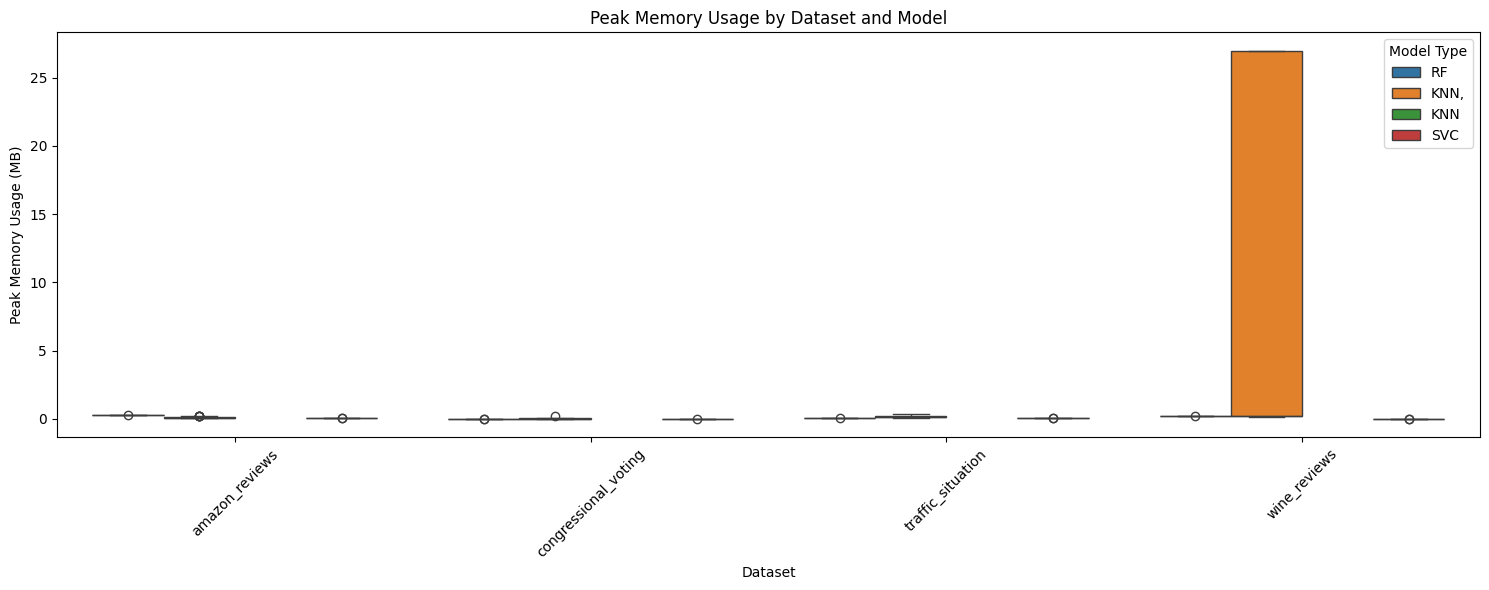


Memory Usage Analysis

Dataset: amazon_reviews
------------------------------

Summary Statistics (MB):
            mean   std   min   max  count
model_type                               
KNN,        0.10  0.04  0.06  0.25    126
RF          0.27  0.00  0.27  0.27    864
SVC         0.06  0.00  0.06  0.07     48

Kruskal-Wallis test:
H-statistic: nan
p-value: nan


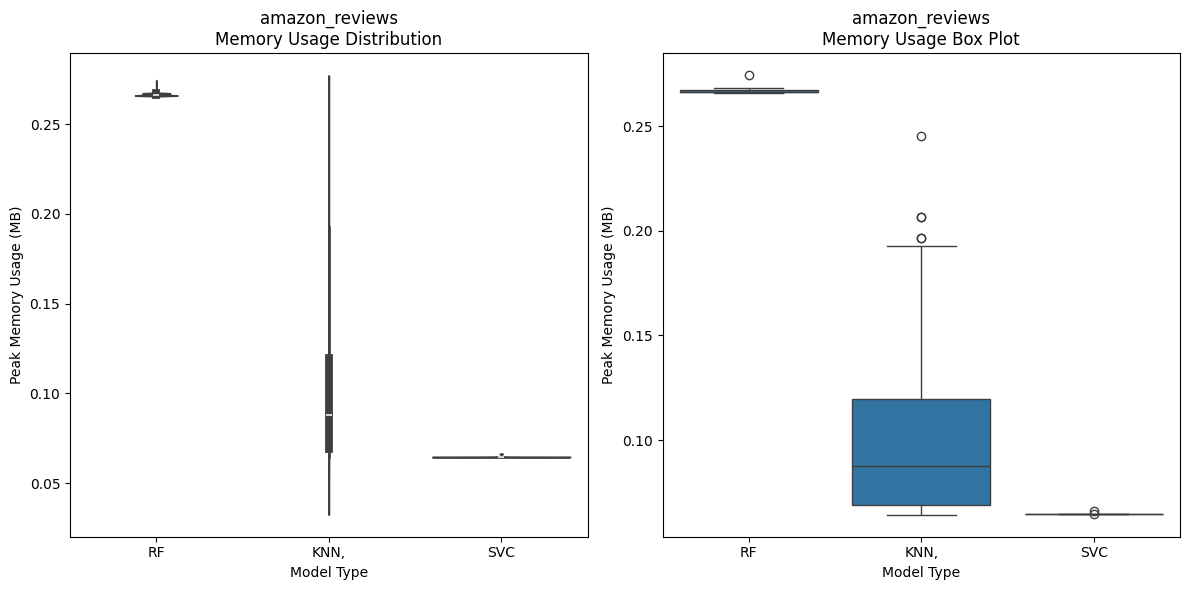


RF Parameter Correlation with Memory Usage:
n_estimators: correlation = 0.9829, p-value = 0.0000
max_depth: correlation = -0.0132, p-value = 0.6984
min_samples_split: correlation = -0.0094, p-value = 0.7829
min_samples_leaf: correlation = -0.0064, p-value = 0.8502

KNN, Parameter Correlation with Memory Usage:

KNN Parameter Correlation with Memory Usage:

SVC Parameter Correlation with Memory Usage:

Dataset: congressional_voting
------------------------------

Summary Statistics (MB):
            mean   std   min   max  count
model_type                               
KNN,        0.03  0.02  0.01  0.25    126
RF          0.01  0.00  0.01  0.02    864
SVC         0.01  0.00  0.01  0.01     48

Kruskal-Wallis test:
H-statistic: nan
p-value: nan


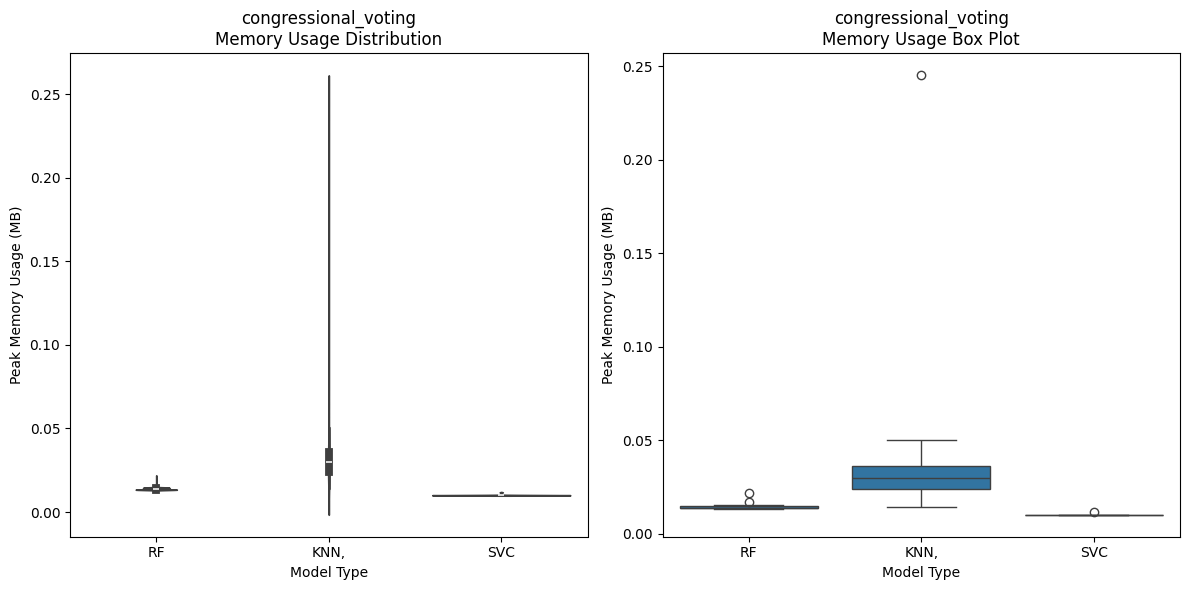


RF Parameter Correlation with Memory Usage:
n_estimators: correlation = 0.9789, p-value = 0.0000
max_depth: correlation = -0.0162, p-value = 0.6347
min_samples_split: correlation = -0.0187, p-value = 0.5833
min_samples_leaf: correlation = -0.0094, p-value = 0.7817

KNN, Parameter Correlation with Memory Usage:

KNN Parameter Correlation with Memory Usage:

SVC Parameter Correlation with Memory Usage:

Dataset: traffic_situation
------------------------------

Summary Statistics (MB):
            mean   std   min   max  count
model_type                               
KNN,        0.19  0.09  0.07  0.39    126
RF          0.08  0.00  0.07  0.08    796
SVC         0.06  0.00  0.06  0.06     48

Kruskal-Wallis test:
H-statistic: nan
p-value: nan


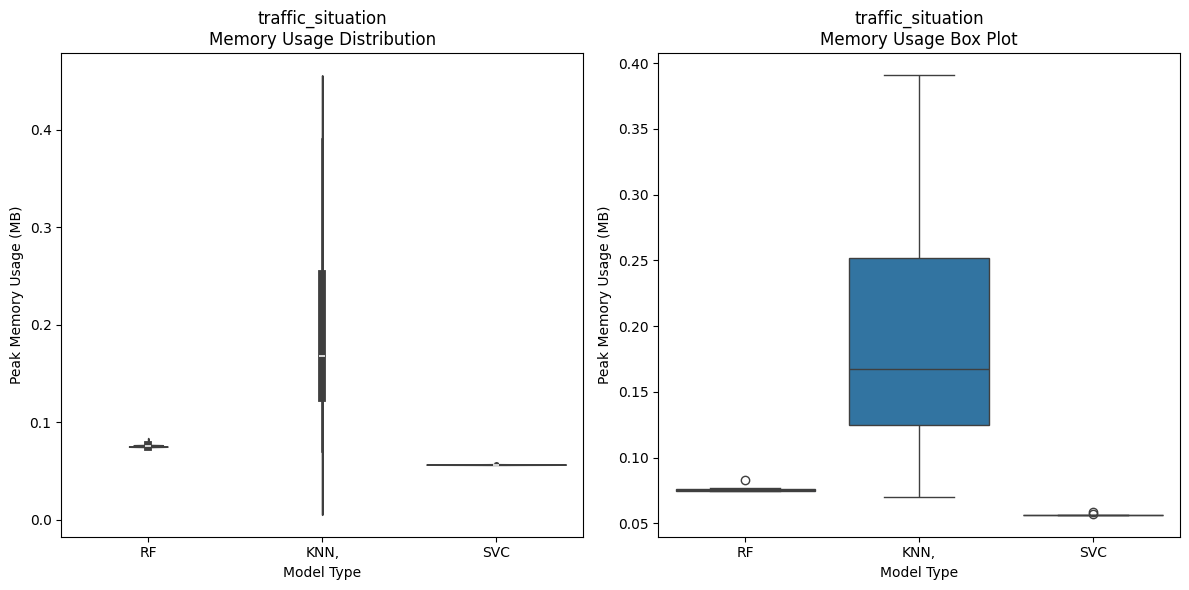


RF Parameter Correlation with Memory Usage:
n_estimators: correlation = 0.9671, p-value = 0.0000
max_depth: correlation = -0.0680, p-value = 0.0551
min_samples_split: correlation = -0.0280, p-value = 0.4304
min_samples_leaf: correlation = -0.0050, p-value = 0.8871

KNN, Parameter Correlation with Memory Usage:

KNN Parameter Correlation with Memory Usage:

SVC Parameter Correlation with Memory Usage:

Dataset: wine_reviews
------------------------------

Summary Statistics (MB):
            mean    std   min    max  count
model_type                                 
KNN          NaN    NaN   NaN    NaN      0
KNN,        9.13  12.65  0.11  26.98    126
RF          0.23   0.00  0.23   0.24    864
SVC         0.01   0.00  0.01   0.02     48

Kruskal-Wallis test:
H-statistic: nan
p-value: nan


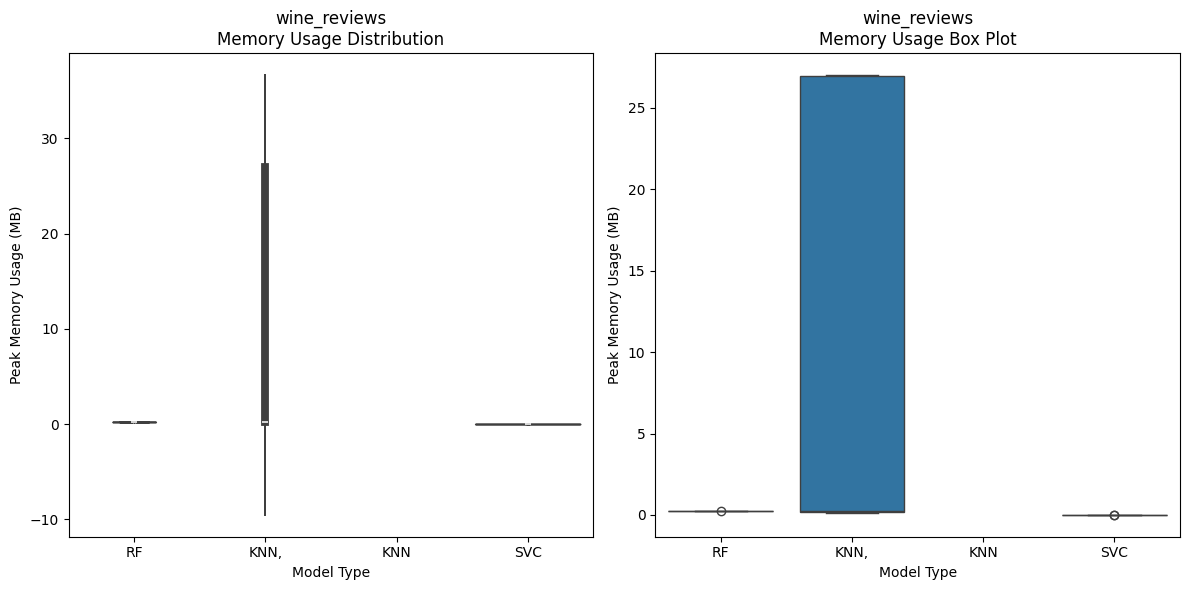


RF Parameter Correlation with Memory Usage:
n_estimators: correlation = 0.9745, p-value = 0.0000
max_depth: correlation = -0.0138, p-value = 0.6853
min_samples_split: correlation = -0.0157, p-value = 0.6459
min_samples_leaf: correlation = -0.0044, p-value = 0.8973

KNN, Parameter Correlation with Memory Usage:

KNN Parameter Correlation with Memory Usage:
k: correlation = nan, p-value = nan

SVC Parameter Correlation with Memory Usage:
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

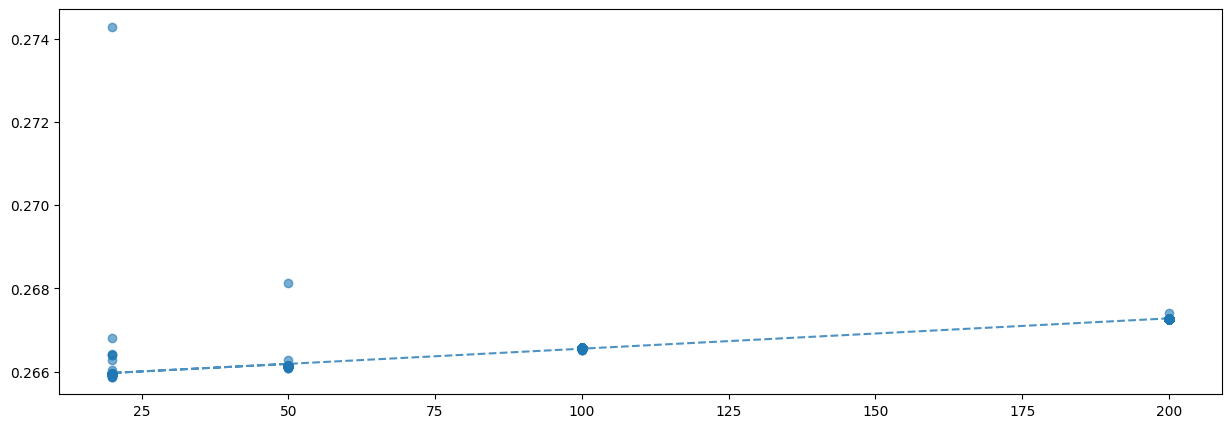

In [90]:
from scipy import stats


def analyze_memory_usage(df):
    """
    Analyze peak memory usage across datasets and models.
    
    Args:
        df: DataFrame containing the results
    """
    datasets = df['dataset'].unique()
    models = df['model_type'].unique()
    
    # Overall comparison
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df, x='dataset', y='peak_memory_usage_mb', hue='model_type')
    plt.title('Peak Memory Usage by Dataset and Model')
    plt.xlabel('Dataset')
    plt.ylabel('Peak Memory Usage (MB)')
    plt.xticks(rotation=45)
    plt.legend(title='Model Type')
    plt.tight_layout()
    plt.show()

    # Statistical analysis for each dataset
    print("\nMemory Usage Analysis")
    print("="*50)
    
    for dataset in datasets:
        print(f"\nDataset: {dataset}")
        print("-"*30)
        
        dataset_df = df[df['dataset'] == dataset]
        
        # Summary statistics
        summary = dataset_df.groupby('model_type')['peak_memory_usage_mb'].agg([
            'mean', 'std', 'min', 'max', 'count'
        ]).round(2)
        
        print("\nSummary Statistics (MB):")
        print(summary)
        
        # Kruskal-Wallis H-test
        model_groups = [dataset_df[dataset_df['model_type'] == m]['peak_memory_usage_mb'].values 
                       for m in models]
        
        try:
            h_stat, p_val = stats.kruskal(*model_groups)
            print(f"\nKruskal-Wallis test:")
            print(f"H-statistic: {h_stat:.4f}")
            print(f"p-value: {p_val:.4f}")
        except Exception as e:
            print(f"Could not perform Kruskal-Wallis test: {str(e)}")
        
        # Detailed visualization for each dataset
        plt.figure(figsize=(12, 6))
        
        # Create violin plot
        plt.subplot(1, 2, 1)
        sns.violinplot(data=dataset_df, x='model_type', y='peak_memory_usage_mb')
        plt.title(f'{dataset}\nMemory Usage Distribution')
        plt.xlabel('Model Type')
        plt.ylabel('Peak Memory Usage (MB)')
        
        # Create box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=dataset_df, x='model_type', y='peak_memory_usage_mb')
        plt.title(f'{dataset}\nMemory Usage Box Plot')
        plt.xlabel('Model Type')
        plt.ylabel('Peak Memory Usage (MB)')
        
        plt.tight_layout()
        plt.show()
        
        # Parameter correlation analysis for each model
        for model in models:
            model_df = dataset_df[dataset_df['model_type'] == model]
            
            if model == 'RF':
                params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']
            elif model == 'SVM':
                params = ['C', 'gamma', 'degree']
            elif model == 'KNN':
                params = ['k']
            
            print(f"\n{model} Parameter Correlation with Memory Usage:")
            for param in params:
                if param in model_df.columns and model_df[param].nunique() > 1:
                    try:
                        correlation, p_val = stats.spearmanr(model_df[param], 
                                                           model_df['peak_memory_usage_mb'])
                        print(f"{param}: correlation = {correlation:.4f}, p-value = {p_val:.4f}")
                    except Exception as e:
                        print(f"Could not compute correlation for {param}: {str(e)}")

# Add time series plot
def plot_memory_trends(df):
    """
    Plot memory usage trends across different parameter values.
    """
    datasets = df['dataset'].unique()
    models = df['model_type'].unique()
    
    for dataset in datasets:
        dataset_df = df[df['dataset'] == dataset]
        
        plt.figure(figsize=(15, 5))
        for model in models:
            model_df = dataset_df[dataset_df['model_type'] == model]
            
            if model == 'RF':
                param = 'n_estimators'
            elif model == 'SVM':
                param = 'C'
            elif model == 'KNN':
                param = 'k'
            
            if param in model_df.columns:
                plt.scatter(model_df[param], model_df['peak_memory_usage_mb'], 
                          label=f'{model}', alpha=0.6)
                
                # Add trend line
                z = np.polyfit(model_df[param], model_df['peak_memory_usage_mb'], 1)
                p = np.poly1d(z)
                plt.plot(model_df[param], p(model_df[param]), 
                        linestyle='--', alpha=0.8)
        
        plt.title(f'Memory Usage Trends - {dataset}')
        plt.xlabel('Parameter Value')
        plt.ylabel('Peak Memory Usage (MB)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# Usage
analyze_memory_usage(all_model_data)
plot_memory_trends(all_model_data)

# Additional analysis: Memory usage relative to dataset size
def analyze_relative_memory_usage(df):
    """
    Analyze memory usage relative to dataset characteristics
    """
    plt.figure(figsize=(15, 5))
    
    # Memory usage per sample
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='dataset', y='peak_memory_usage_mb', hue='model_type')
    plt.title('Absolute Memory Usage')
    plt.xticks(rotation=45)
    
    # You might want to add dataset size information if available
    # df['memory_per_sample'] = df['peak_memory_usage_mb'] / df['dataset_size']
    # plt.subplot(1, 2, 2)
    # sns.boxplot(data=df, x='dataset', y='memory_per_sample', hue='model_type')
    # plt.title('Memory Usage per Sample')
    # plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Usage
analyze_relative_memory_usage(all_model_data)

# Print overall statistics
print("\nOverall Memory Usage Statistics")
print("="*50)
summary = all_model_data.groupby(['dataset', 'model_type'])['peak_memory_usage_mb'].agg([
    'mean', 'std', 'min', 'max', 'count'
]).round(2)
print(summary)

In [ ]:
# # Assuming your DataFrame is called 'svm_data'
# parsed_df = parse_model_parameters(svc_data)

# # View the new columns
# print(parsed_df.columns)

# # Example queries:
# # Get all RF models with max_depth=5
# rf_depth_5 = parsed_df[
#     (parsed_df['model_type'] == 'RF') & 
#     (parsed_df['max_depth'] == 5)
# ]

# # Get average accuracy grouped by model_type
# avg_by_model = parsed_df.groupby('model_type')['accuracy'].mean()

# # Get best performing configuration for each model type
# best_configs = parsed_df.sort_values('accuracy', ascending=False).groupby('model_type').first()

Index(['accuracy', 'classification_report', 'y_score', 'y_pred_decoded',
       'elapsed_time_seconds', 'peak_memory_usage_mb', 'model_name', 'dataset',
       'model_type_parsed', 'param_kernel', 'param_C', 'param_gamma',
       'param_degree', 'model_type', 'kernel', 'C', 'gamma', 'degree'],
      dtype='object')


KeyError: 'max_depth'

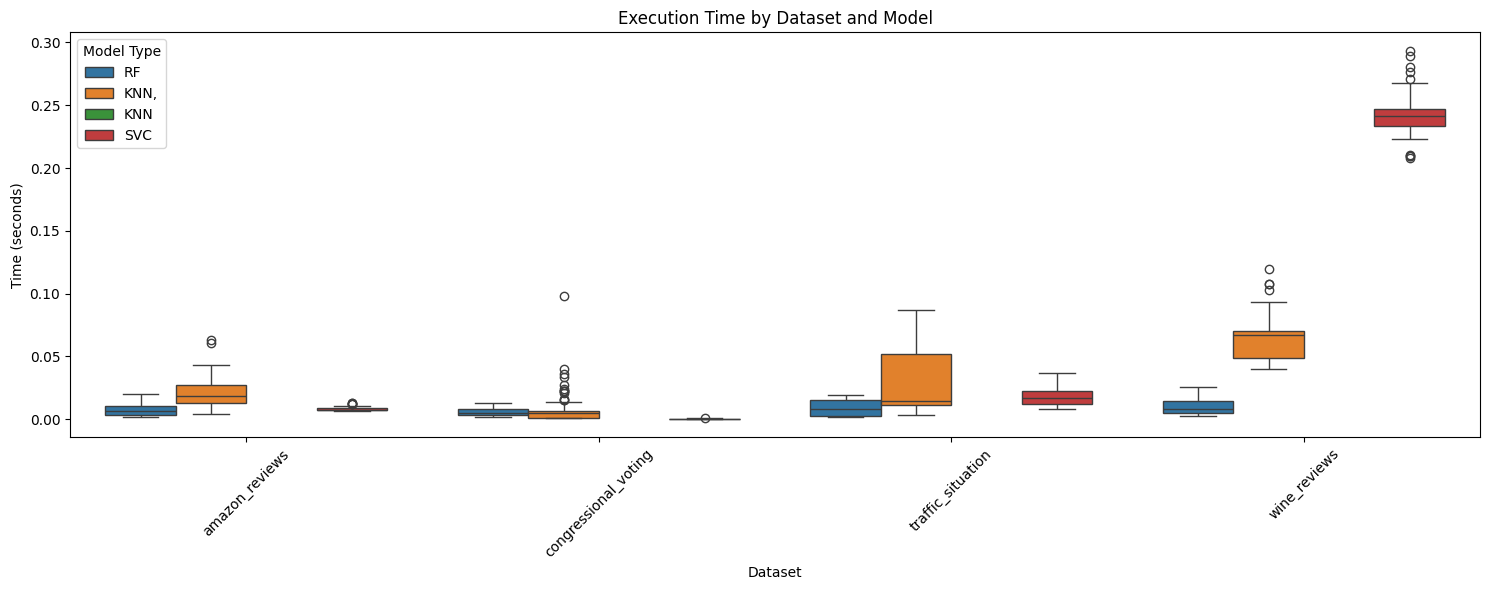


Execution Time Analysis

Dataset: amazon_reviews
------------------------------

Summary Statistics (seconds):
              mean     std     min     max  count
model_type                                       
KNN,        0.0209  0.0099  0.0041  0.0634    126
RF          0.0077  0.0052  0.0018  0.0200    864
SVC         0.0083  0.0018  0.0068  0.0126     48

Kruskal-Wallis test:
H-statistic: nan
p-value: nan


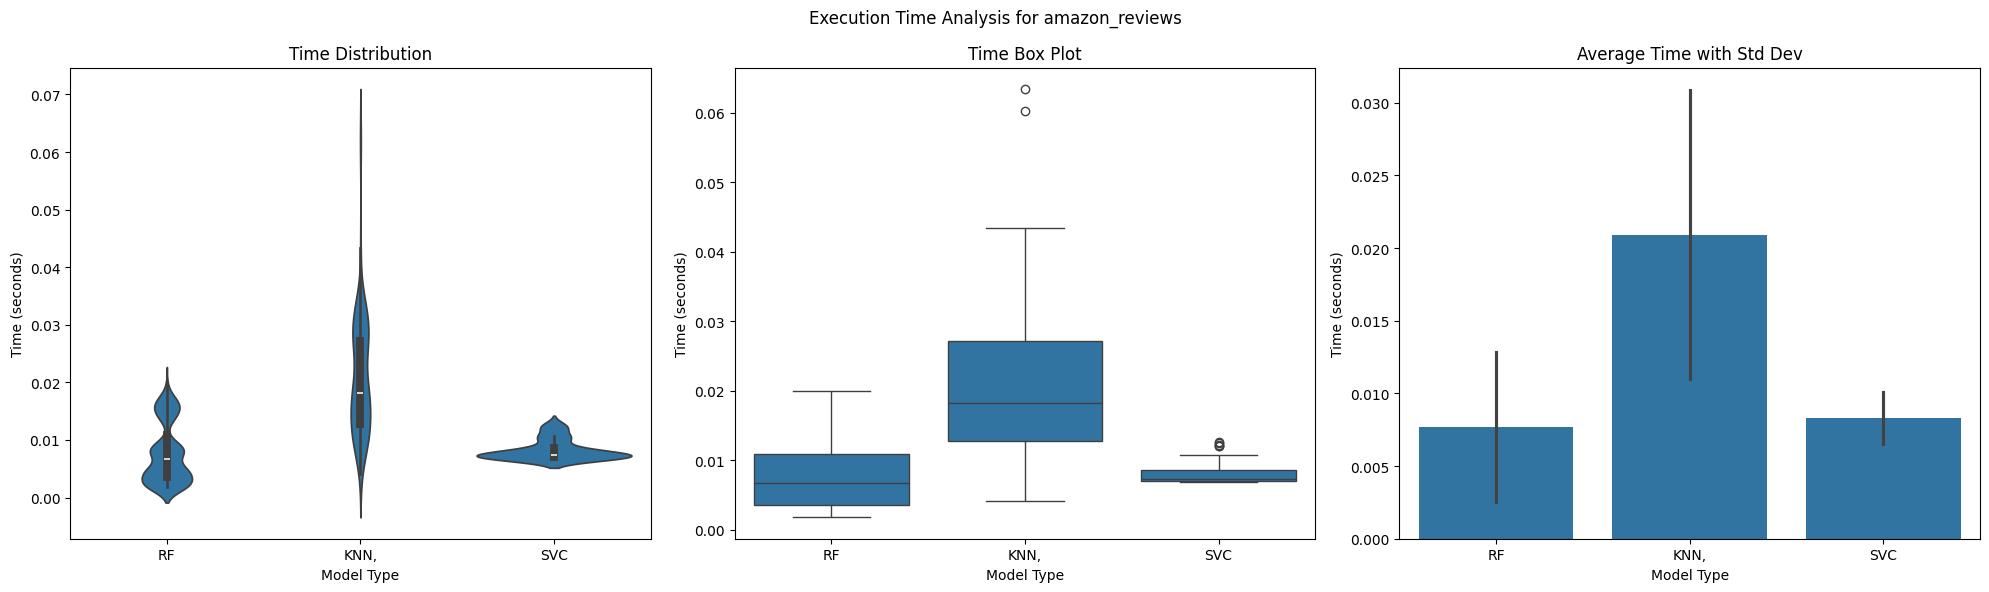


RF Parameter Correlation with Execution Time:
n_estimators: correlation = 0.9682, p-value = 0.0000


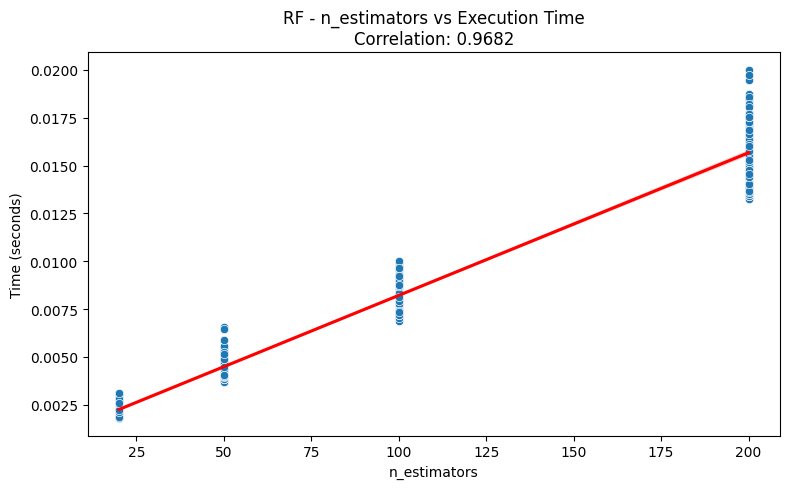

max_depth: correlation = 0.1837, p-value = 0.0000


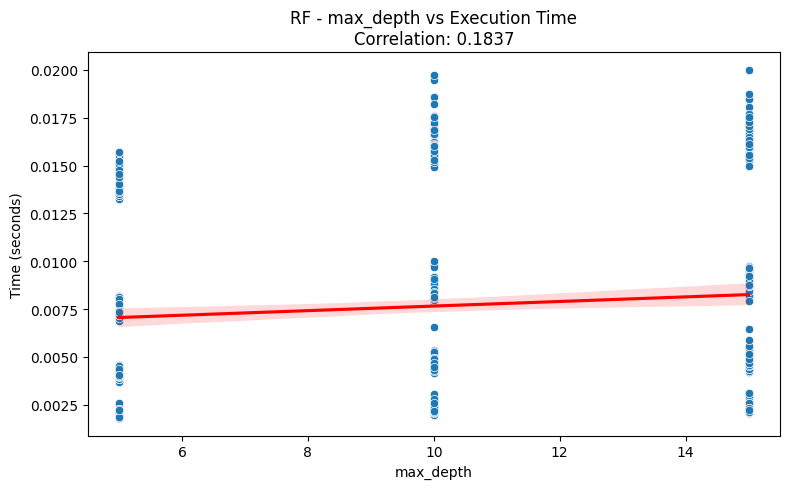

min_samples_split: correlation = -0.0381, p-value = 0.2629
min_samples_leaf: correlation = -0.0304, p-value = 0.3718

KNN, Parameter Correlation with Execution Time:

KNN Parameter Correlation with Execution Time:

SVC Parameter Correlation with Execution Time:

Dataset: congressional_voting
------------------------------

Summary Statistics (seconds):
              mean     std     min     max  count
model_type                                       
KNN,        0.0064  0.0110  0.0005  0.0982    126
RF          0.0055  0.0036  0.0015  0.0128    864
SVC         0.0004  0.0001  0.0002  0.0009     48

Kruskal-Wallis test:
H-statistic: nan
p-value: nan


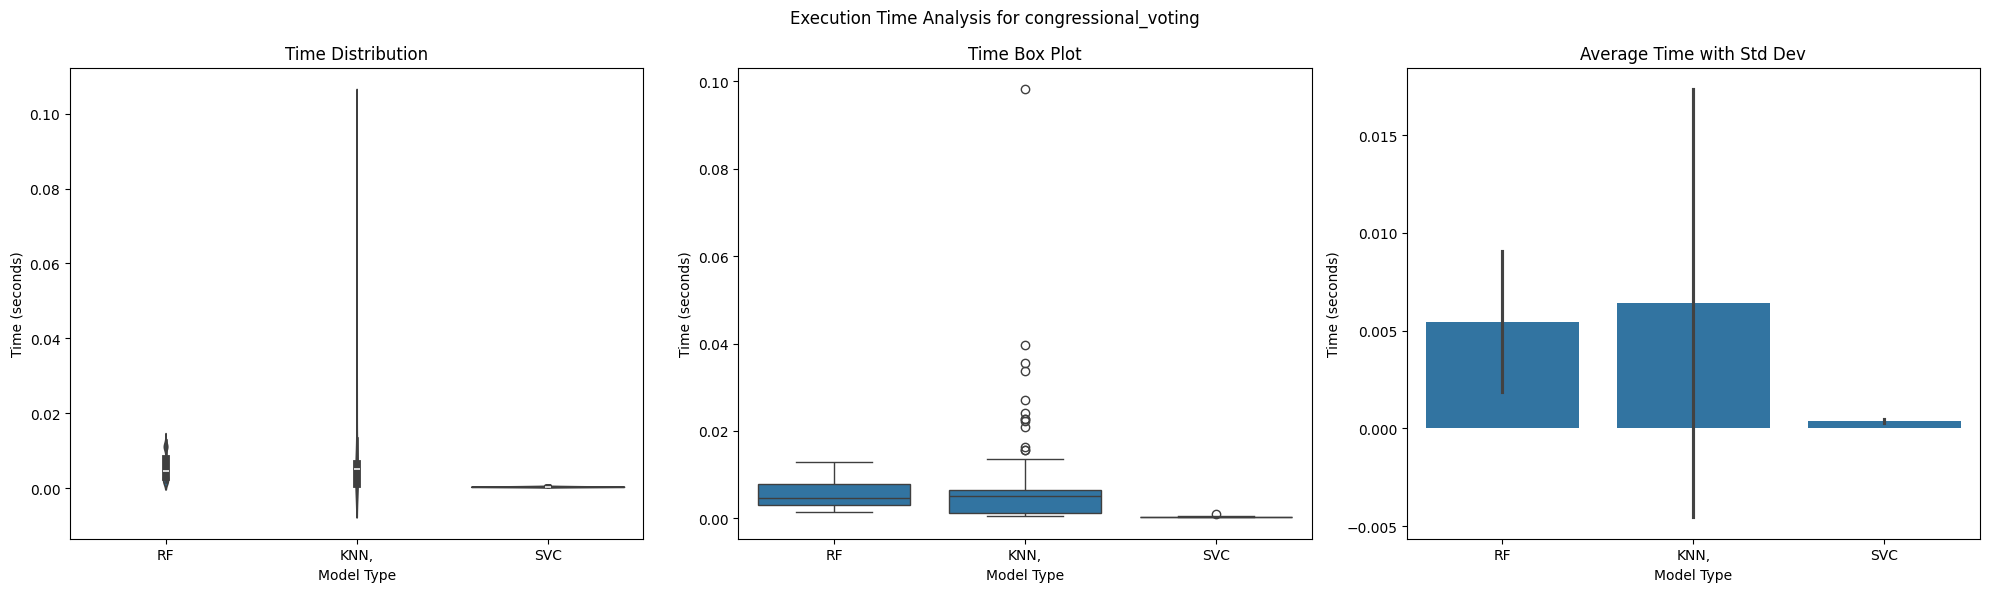


RF Parameter Correlation with Execution Time:
n_estimators: correlation = 0.9682, p-value = 0.0000


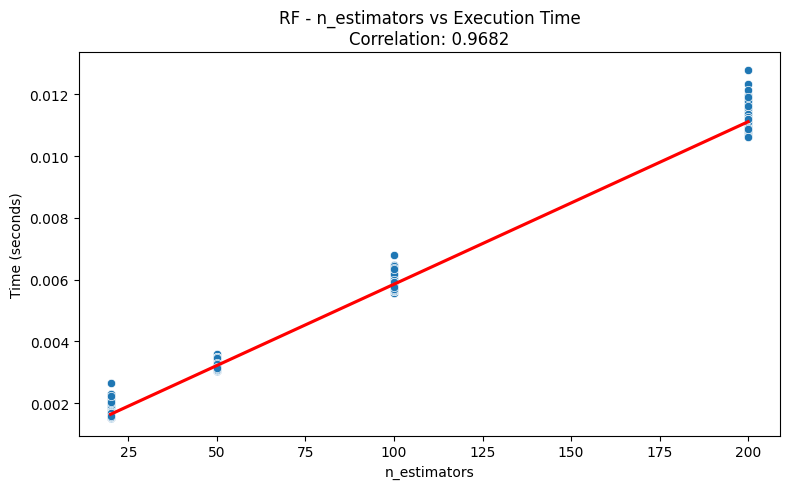

max_depth: correlation = 0.0226, p-value = 0.5070
min_samples_split: correlation = -0.0126, p-value = 0.7111
min_samples_leaf: correlation = -0.0194, p-value = 0.5684

KNN, Parameter Correlation with Execution Time:

KNN Parameter Correlation with Execution Time:

SVC Parameter Correlation with Execution Time:

Dataset: traffic_situation
------------------------------

Summary Statistics (seconds):
              mean     std     min     max  count
model_type                                       
KNN,        0.0292  0.0214  0.0031  0.0873    126
RF          0.0083  0.0056  0.0019  0.0189    796
SVC         0.0180  0.0074  0.0082  0.0368     48

Kruskal-Wallis test:
H-statistic: nan
p-value: nan


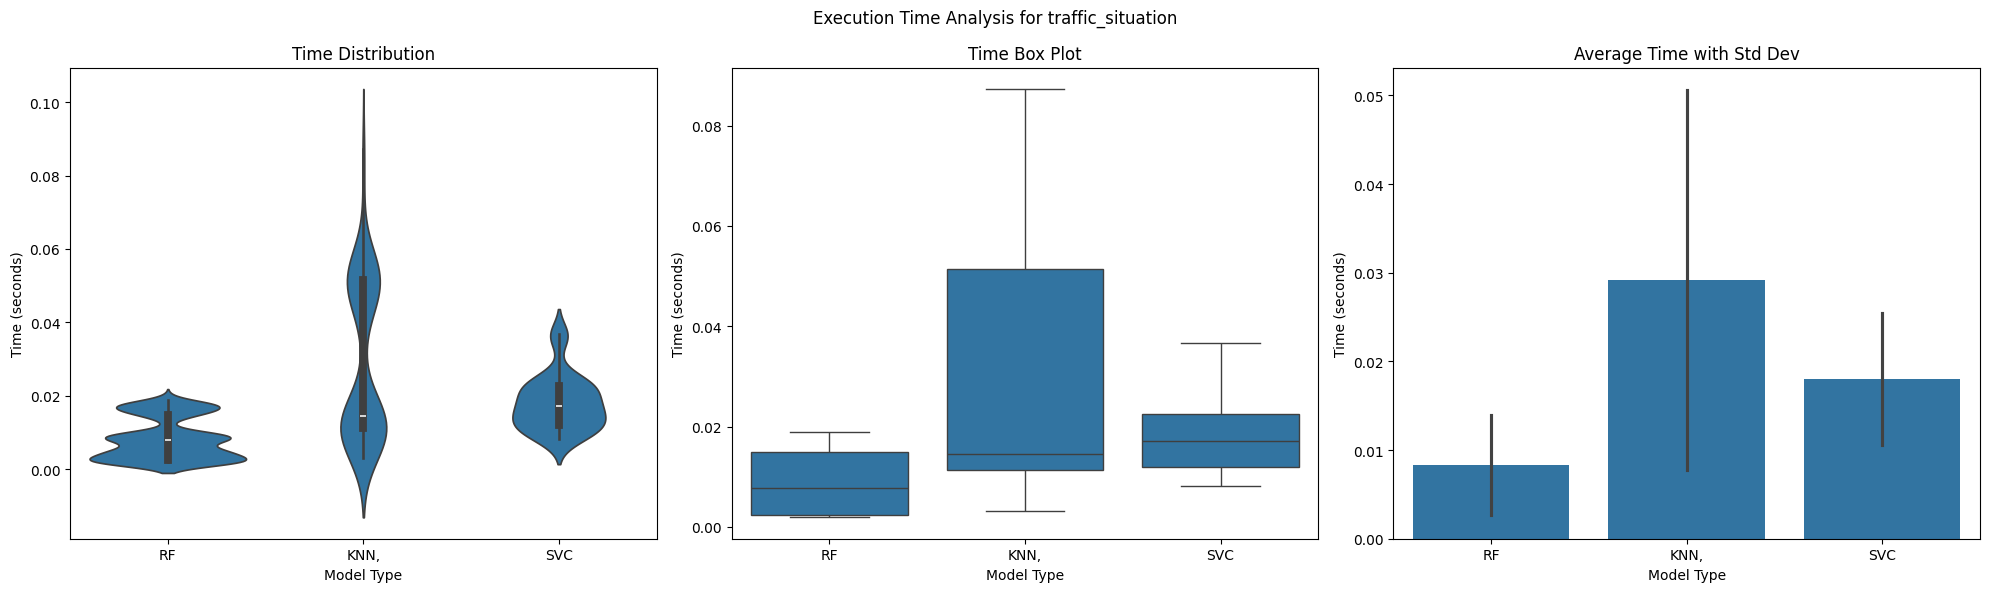


RF Parameter Correlation with Execution Time:
n_estimators: correlation = 0.9662, p-value = 0.0000


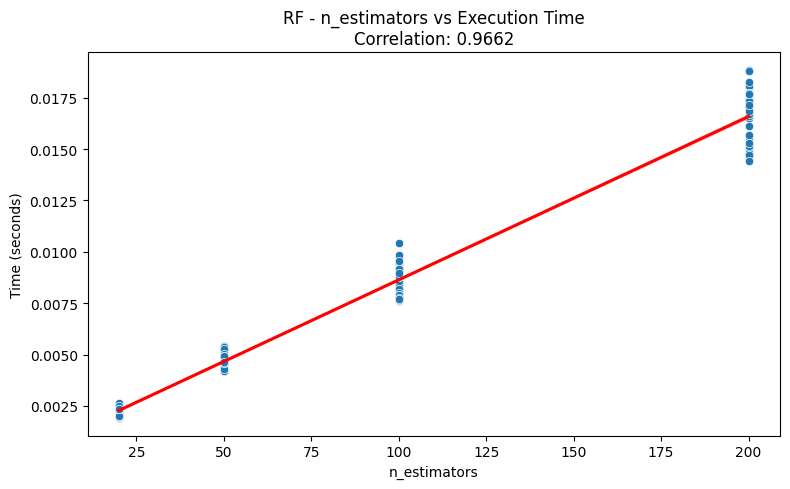

max_depth: correlation = 0.1319, p-value = 0.0002


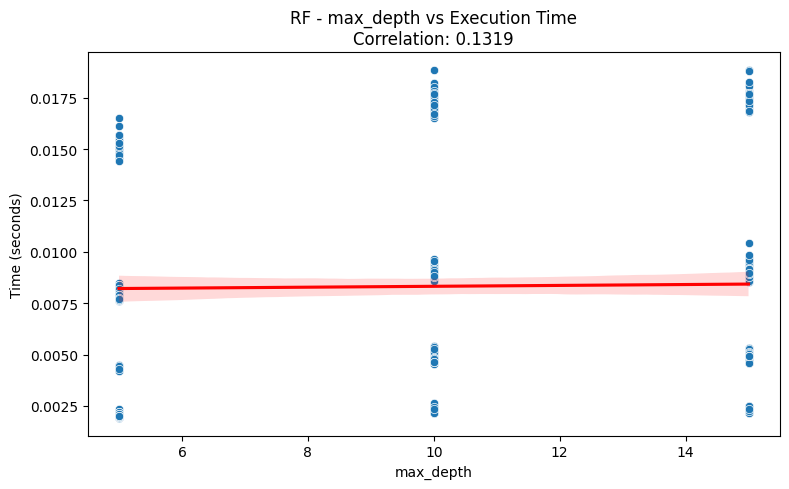

min_samples_split: correlation = -0.0345, p-value = 0.3315
min_samples_leaf: correlation = -0.0151, p-value = 0.6708

KNN, Parameter Correlation with Execution Time:

KNN Parameter Correlation with Execution Time:

SVC Parameter Correlation with Execution Time:

Dataset: wine_reviews
------------------------------

Summary Statistics (seconds):
              mean     std     min     max  count
model_type                                       
KNN            NaN     NaN     NaN     NaN      0
KNN,        0.0637  0.0167  0.0401  0.1197    126
RF          0.0097  0.0064  0.0026  0.0254    864
SVC         0.2422  0.0186  0.2081  0.2934     48

Kruskal-Wallis test:
H-statistic: nan
p-value: nan


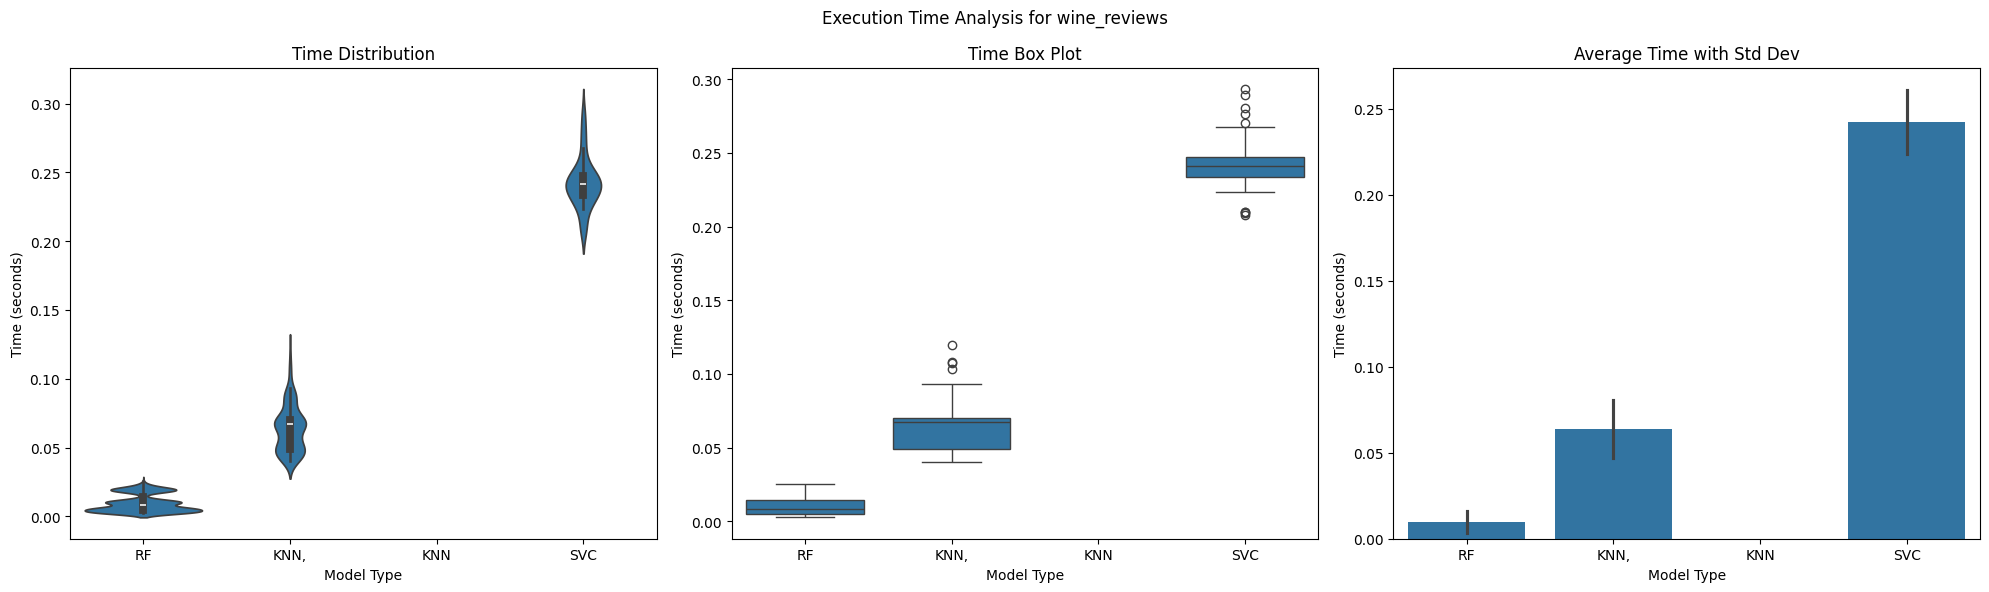


RF Parameter Correlation with Execution Time:
n_estimators: correlation = 0.9682, p-value = 0.0000


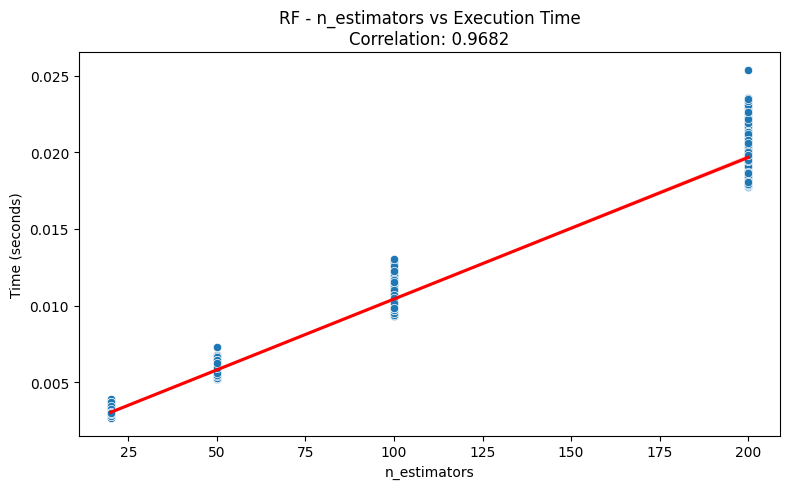

max_depth: correlation = 0.1448, p-value = 0.0000


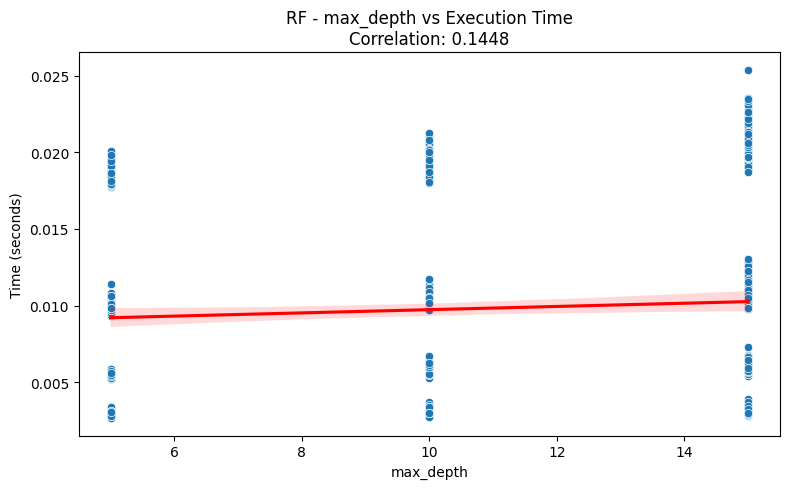

min_samples_split: correlation = 0.0006, p-value = 0.9867
min_samples_leaf: correlation = -0.0385, p-value = 0.2579

KNN, Parameter Correlation with Execution Time:

KNN Parameter Correlation with Execution Time:
k: correlation = nan, p-value = nan

SVC Parameter Correlation with Execution Time:


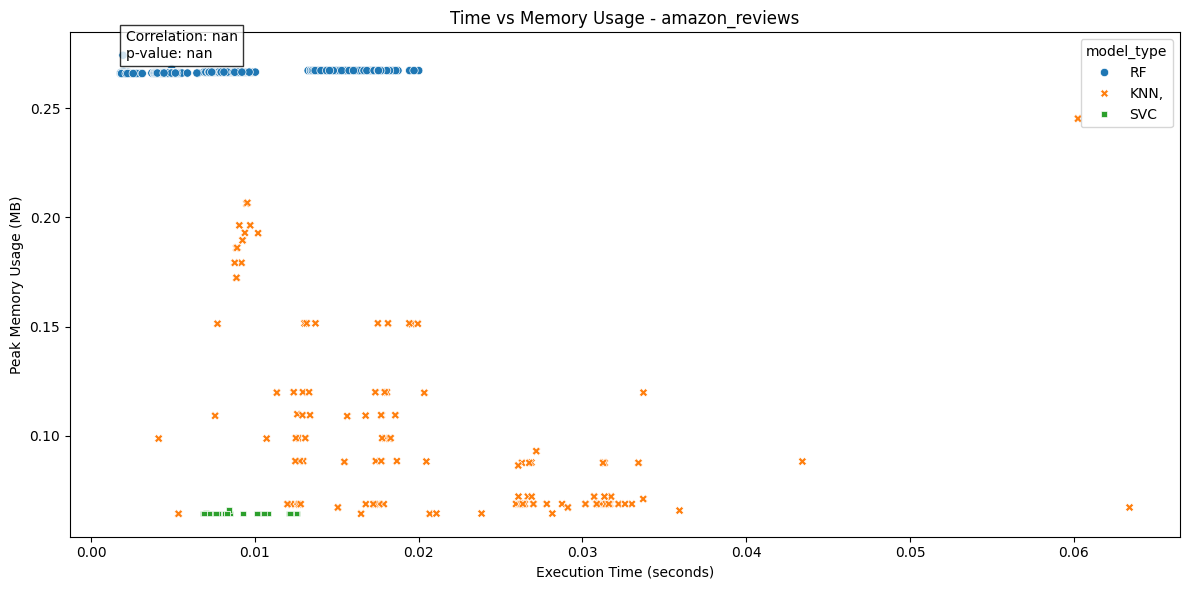

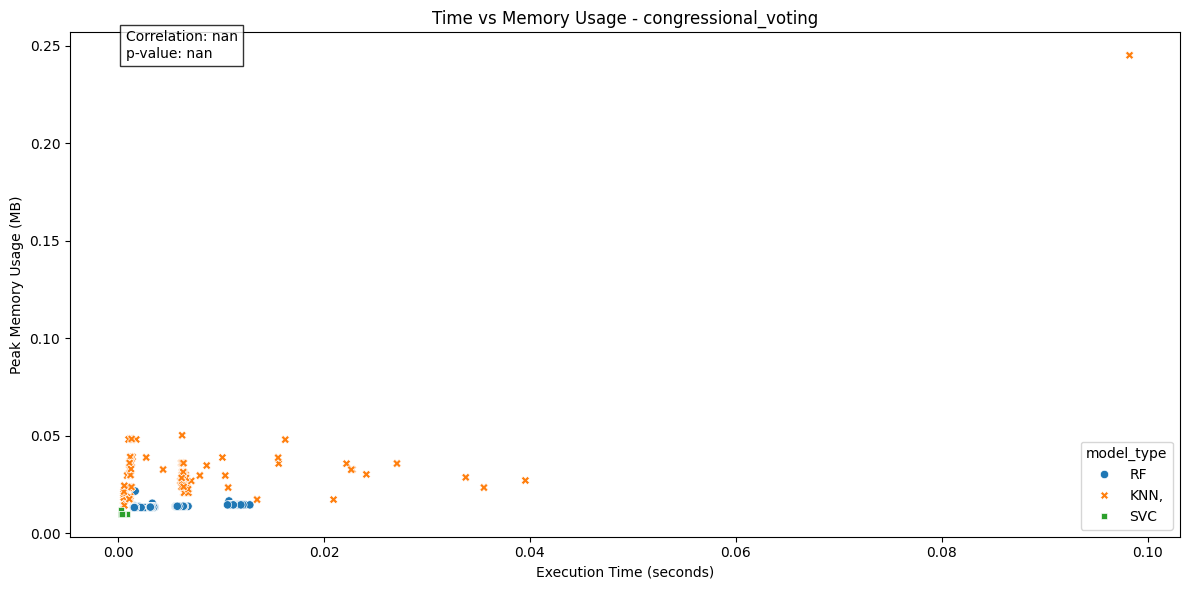

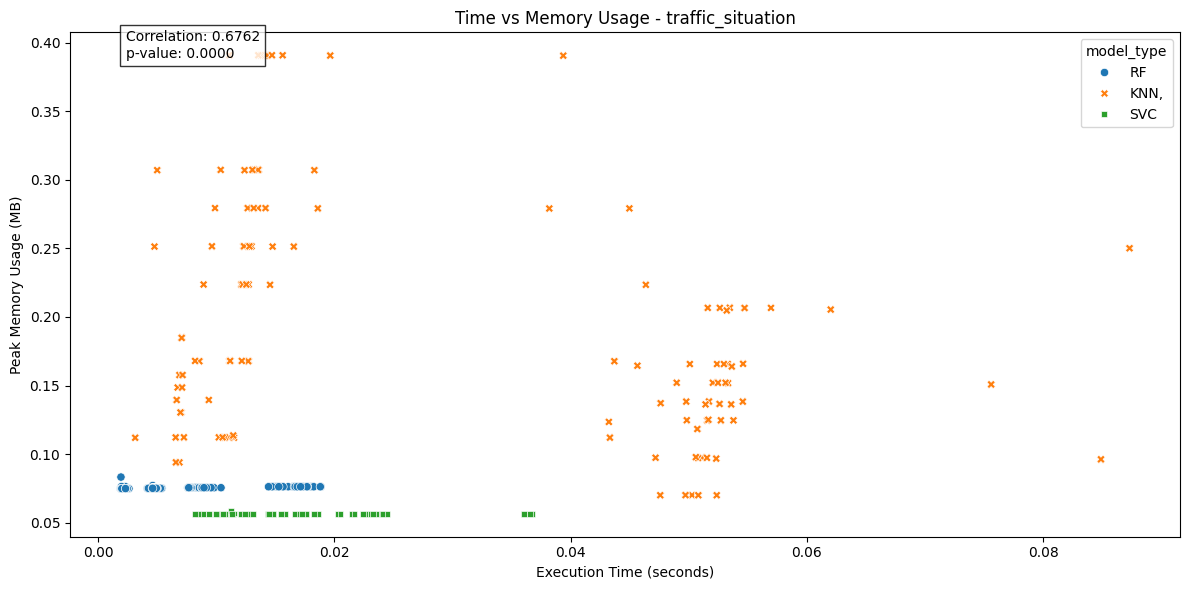

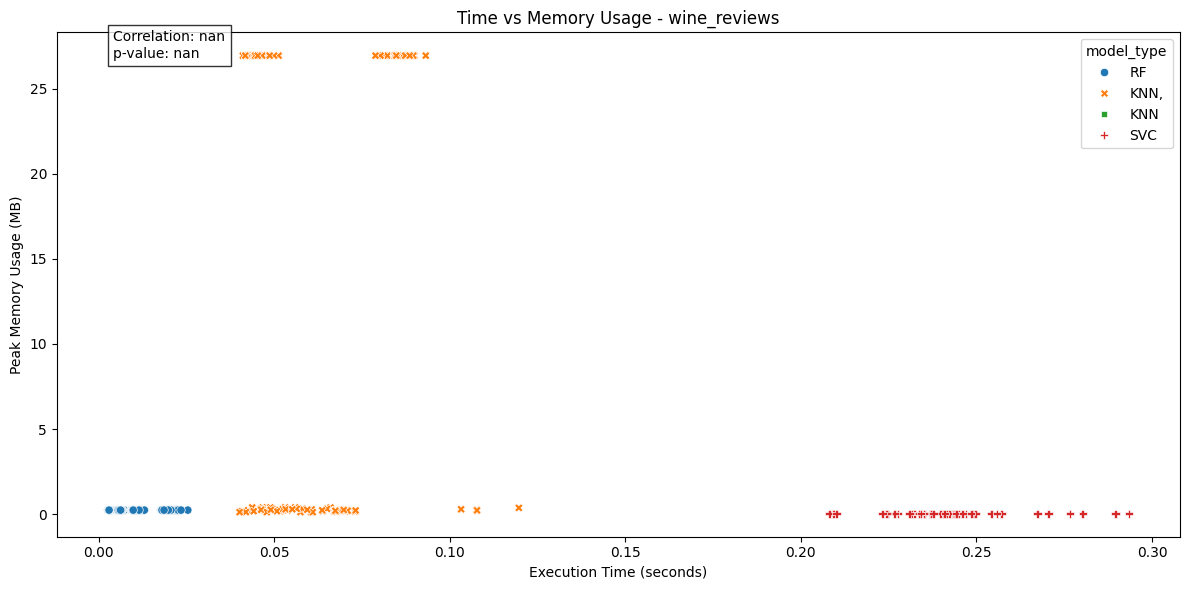

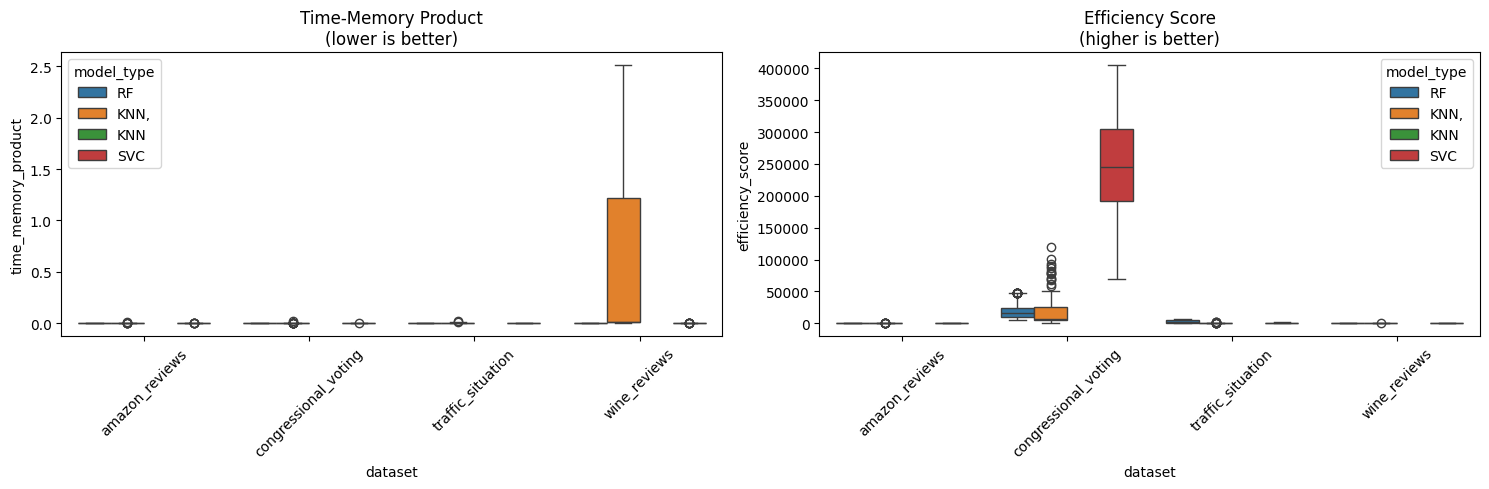


Efficiency Metrics Summary
                                time_memory_product         efficiency_score  \
                                               mean     std             mean   
dataset              model_type                                                
amazon_reviews       KNN,                    0.0019  0.0013         177.7860   
                     RF                      0.0020  0.0014         294.6181   
                     SVC                     0.0005  0.0001         390.5747   
congressional_voting KNN,                    0.0004  0.0021       20642.9250   
                     RF                      0.0001  0.0001       21170.4568   
                     SVC                     0.0000  0.0000      241697.0980   
traffic_situation    KNN,                    0.0050  0.0036         353.3288   
                     RF                      0.0006  0.0004        2673.5550   
                     SVC                     0.0010  0.0004         913.6037   
wine_reviews

In [92]:
def analyze_execution_time(df):
    """
    Analyze execution time across datasets and models.
    
    Args:
        df: DataFrame containing the results
    """
    datasets = df['dataset'].unique()
    models = df['model_type'].unique()
    
    # Overall comparison
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df, x='dataset', y='elapsed_time_seconds', hue='model_type')
    plt.title('Execution Time by Dataset and Model')
    plt.xlabel('Dataset')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45)
    plt.legend(title='Model Type')
    plt.tight_layout()
    plt.show()

    # Statistical analysis for each dataset
    print("\nExecution Time Analysis")
    print("="*50)
    
    for dataset in datasets:
        print(f"\nDataset: {dataset}")
        print("-"*30)
        
        dataset_df = df[df['dataset'] == dataset]
        
        # Summary statistics
        summary = dataset_df.groupby('model_type')['elapsed_time_seconds'].agg([
            'mean', 'std', 'min', 'max', 'count'
        ]).round(4)
        
        print("\nSummary Statistics (seconds):")
        print(summary)
        
        # Kruskal-Wallis H-test
        model_groups = [dataset_df[dataset_df['model_type'] == m]['elapsed_time_seconds'].values 
                       for m in models]
        
        try:
            h_stat, p_val = stats.kruskal(*model_groups)
            print(f"\nKruskal-Wallis test:")
            print(f"H-statistic: {h_stat:.4f}")
            print(f"p-value: {p_val:.4f}")
        except Exception as e:
            print(f"Could not perform Kruskal-Wallis test: {str(e)}")
        
        # Detailed visualization for each dataset
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle(f'Execution Time Analysis for {dataset}')
        
        # Violin plot
        sns.violinplot(data=dataset_df, x='model_type', y='elapsed_time_seconds', ax=axes[0])
        axes[0].set_title('Time Distribution')
        axes[0].set_xlabel('Model Type')
        axes[0].set_ylabel('Time (seconds)')
        
        # Box plot
        sns.boxplot(data=dataset_df, x='model_type', y='elapsed_time_seconds', ax=axes[1])
        axes[1].set_title('Time Box Plot')
        axes[1].set_xlabel('Model Type')
        axes[1].set_ylabel('Time (seconds)')
        
        # Bar plot with error bars
        sns.barplot(data=dataset_df, x='model_type', y='elapsed_time_seconds', ax=axes[2],
                   ci='sd')  # Show standard deviation as error bars
        axes[2].set_title('Average Time with Std Dev')
        axes[2].set_xlabel('Model Type')
        axes[2].set_ylabel('Time (seconds)')
        
        plt.tight_layout()
        plt.show()
        
        # Parameter correlation analysis for each model
        for model in models:
            model_df = dataset_df[dataset_df['model_type'] == model]
            
            if model == 'RF':
                params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']
            elif model == 'SVM':
                params = ['C', 'gamma', 'degree']
            elif model == 'KNN':
                params = ['k']
            
            print(f"\n{model} Parameter Correlation with Execution Time:")
            for param in params:
                if param in model_df.columns and model_df[param].nunique() > 1:
                    try:
                        correlation, p_val = stats.spearmanr(model_df[param], 
                                                           model_df['elapsed_time_seconds'])
                        print(f"{param}: correlation = {correlation:.4f}, p-value = {p_val:.4f}")
                        
                        # Create scatter plot for significant correlations
                        if p_val < 0.05:
                            plt.figure(figsize=(8, 5))
                            sns.scatterplot(data=model_df, x=param, y='elapsed_time_seconds')
                            sns.regplot(data=model_df, x=param, y='elapsed_time_seconds', 
                                      scatter=False, color='red')
                            plt.title(f'{model} - {param} vs Execution Time\n'
                                    f'Correlation: {correlation:.4f}')
                            plt.xlabel(param)
                            plt.ylabel('Time (seconds)')
                            plt.tight_layout()
                            plt.show()
                            
                    except Exception as e:
                        print(f"Could not compute correlation for {param}: {str(e)}")

def plot_time_vs_memory(df):
    """
    Analyze relationship between execution time and memory usage
    """
    datasets = df['dataset'].unique()
    
    for dataset in datasets:
        dataset_df = df[df['dataset'] == dataset]
        
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=dataset_df, x='elapsed_time_seconds', y='peak_memory_usage_mb',
                       hue='model_type', style='model_type')
        
        plt.title(f'Time vs Memory Usage - {dataset}')
        plt.xlabel('Execution Time (seconds)')
        plt.ylabel('Peak Memory Usage (MB)')
        
        # Add correlation information
        correlation, p_val = stats.spearmanr(dataset_df['elapsed_time_seconds'],
                                           dataset_df['peak_memory_usage_mb'])
        plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}\np-value: {p_val:.4f}',
                transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

def analyze_efficiency_metrics(df):
    """
    Create composite efficiency metrics
    """
    # Calculate efficiency metrics
    df['time_memory_product'] = df['elapsed_time_seconds'] * df['peak_memory_usage_mb']
    df['efficiency_score'] = df['accuracy'] / (df['elapsed_time_seconds'] * df['peak_memory_usage_mb'])
    
    # Plot efficiency metrics
    plt.figure(figsize=(15, 5))
    
    # Time-Memory Product
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='dataset', y='time_memory_product', hue='model_type')
    plt.title('Time-Memory Product\n(lower is better)')
    plt.xticks(rotation=45)
    
    # Efficiency Score
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='dataset', y='efficiency_score', hue='model_type')
    plt.title('Efficiency Score\n(higher is better)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nEfficiency Metrics Summary")
    print("="*50)
    summary = df.groupby(['dataset', 'model_type']).agg({
        'time_memory_product': ['mean', 'std'],
        'efficiency_score': ['mean', 'std']
    }).round(4)
    print(summary)

# Usage
analyze_execution_time(all_model_data)
plot_time_vs_memory(all_model_data)
analyze_efficiency_metrics(all_model_data)

# Print overall rankings
print("\nOverall Model Rankings")
print("="*50)
rankings = all_model_data.groupby('model_type').agg({
    'elapsed_time_seconds': 'mean',
    'peak_memory_usage_mb': 'mean',
    'accuracy': 'mean',
    'time_memory_product': 'mean',
    'efficiency_score': 'mean'
}).round(4)

print("\nRankings by different metrics:")
for column in rankings.columns:
    if column in ['elapsed_time_seconds', 'peak_memory_usage_mb', 'time_memory_product']:
        print(f"\n{column} (lower is better):")
        print(rankings[column].sort_values())
    else:
        print(f"\n{column} (higher is better):")
        print(rankings[column].sort_values(ascending=False))


Analysis for RF models

Dataset: amazon_reviews

Parameter: n_estimators
                  mean       std  count
n_estimators                           
20.0          0.310412  0.037361    216
50.0          0.398765  0.037325    216
100.0         0.441379  0.036497    216
200.0         0.470288  0.035834    216

Parameter: max_depth
               mean       std  count
max_depth                           
5.0        0.380278  0.070675    288
10.0       0.415478  0.067591    288
15.0       0.419877  0.067134    288

Parameter: min_samples_split
                       mean       std  count
min_samples_split                           
2.0                0.401466  0.072147    288
5.0                0.404352  0.071732    288
10.0               0.409815  0.068038    288

Parameter: min_samples_leaf
                      mean       std  count
min_samples_leaf                           
1.0               0.401914  0.071369    288
2.0               0.402469  0.071034    288
4.0               0

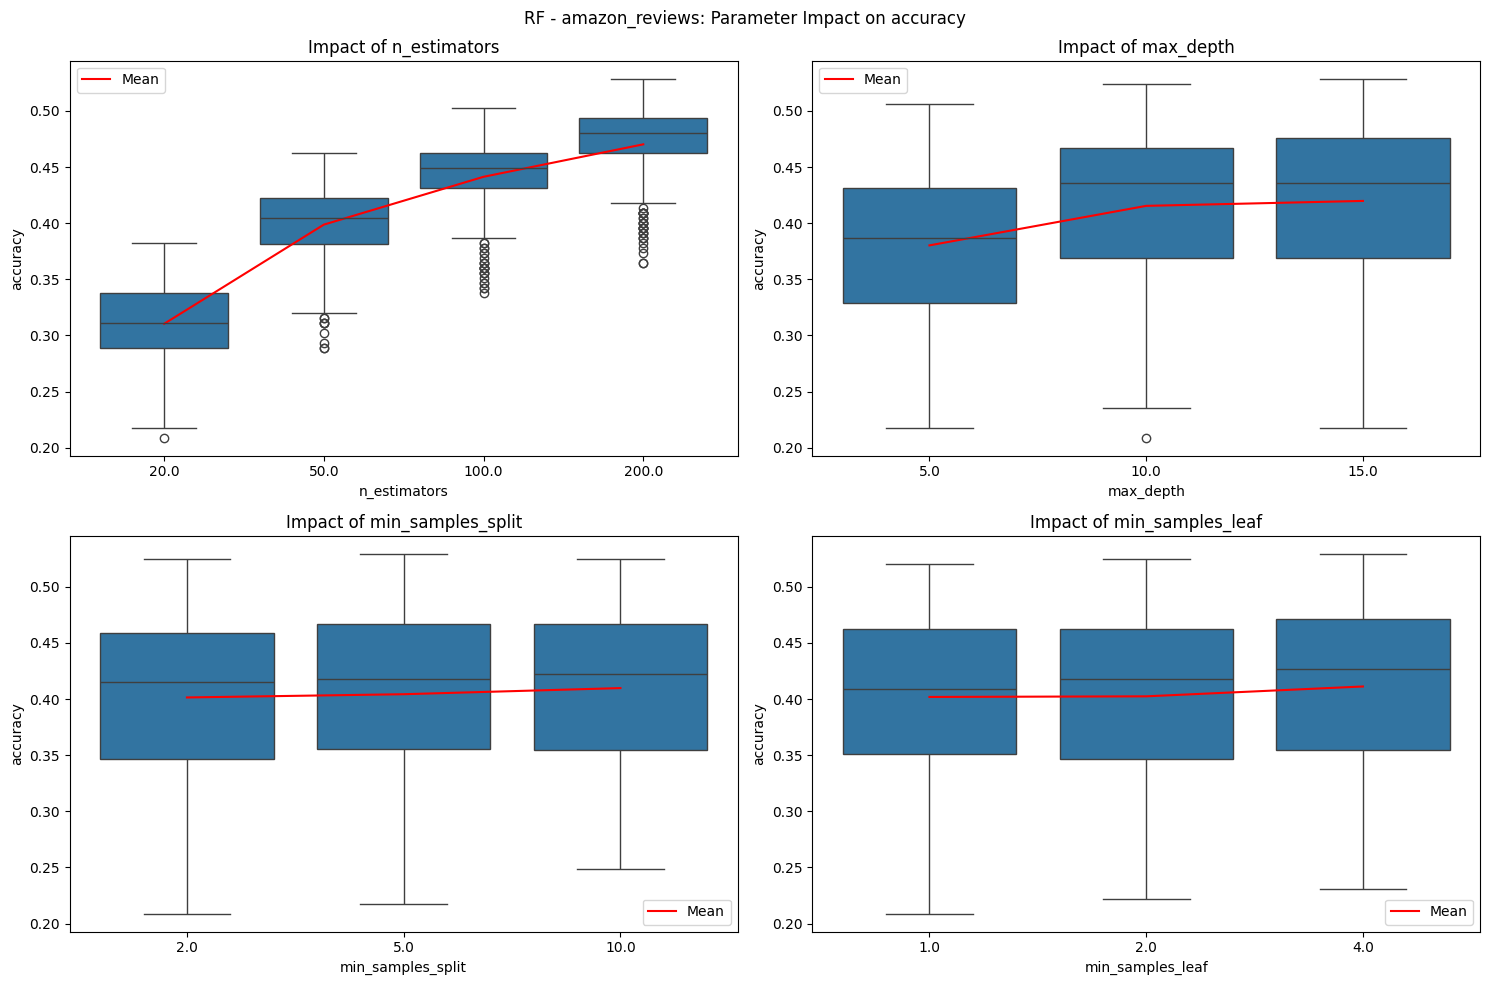


Dataset: congressional_voting

Parameter: n_estimators
                  mean       std  count
n_estimators                           
20.0          0.968434  0.006069    216
50.0          0.969557  0.005060    216
100.0         0.969907  0.004499    216
200.0         0.970118  0.004112    216

Parameter: max_depth
               mean       std  count
max_depth                           
5.0        0.968908  0.004751    288
10.0       0.969802  0.005058    288
15.0       0.969802  0.005214    288

Parameter: min_samples_split
                       mean       std  count
min_samples_split                           
2.0                0.969592  0.006692    288
5.0                0.969276  0.005497    288
10.0               0.969644  0.000893    288

Parameter: min_samples_leaf
                      mean       std  count
min_samples_leaf                           
1.0               0.969592  0.007898    288
2.0               0.969434  0.002670    288
4.0               0.969487  0.002521 

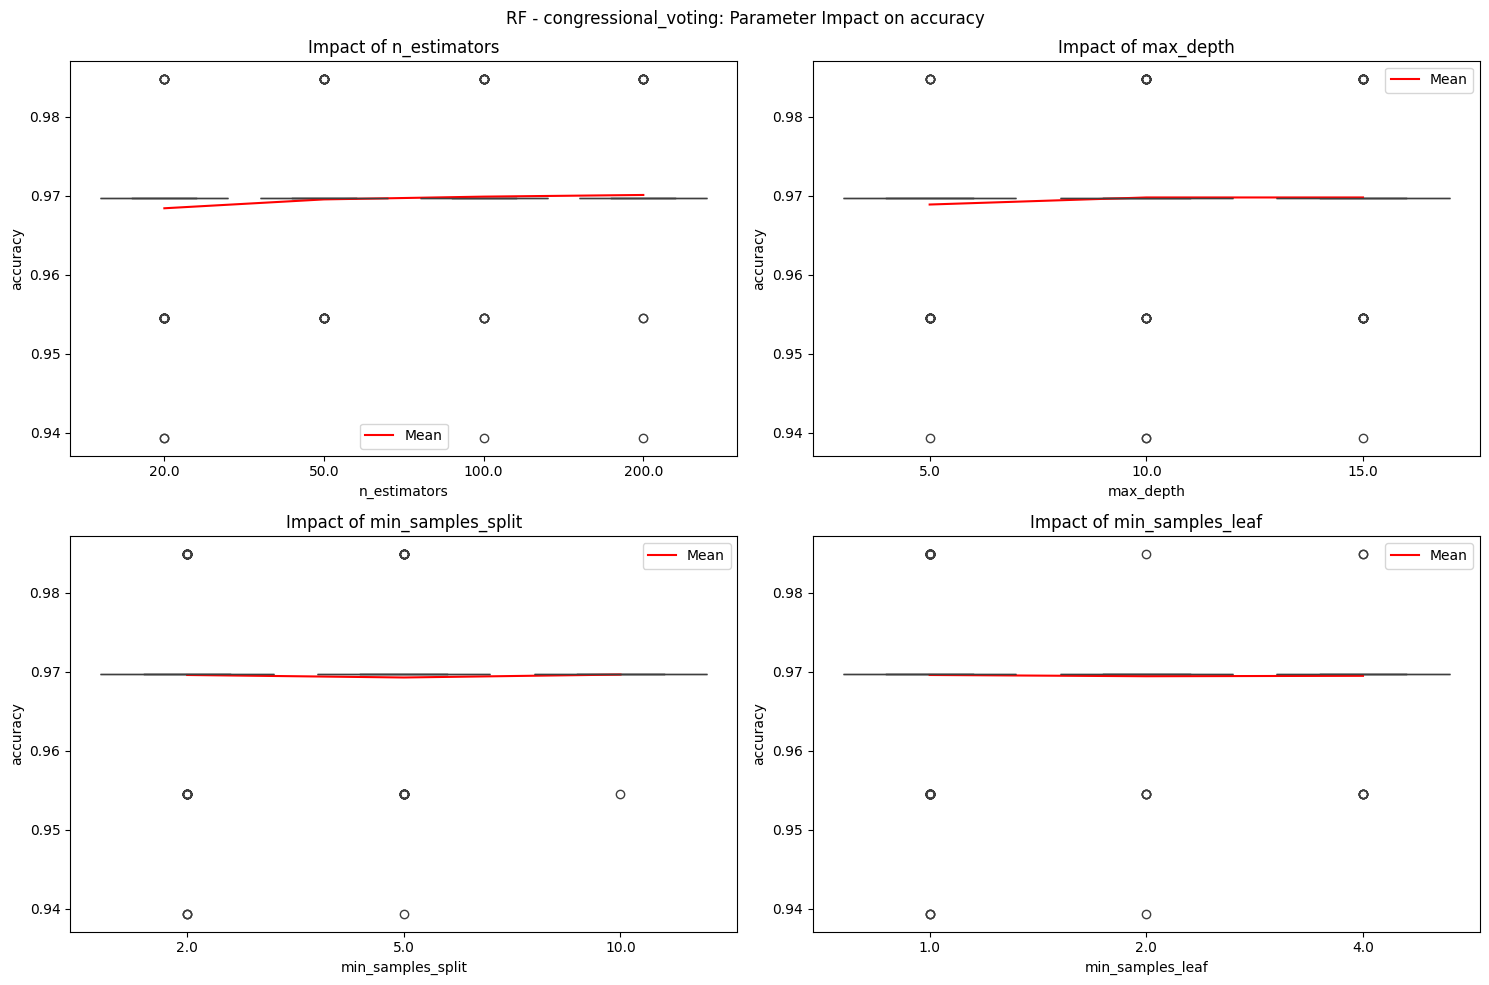


Dataset: traffic_situation

Parameter: n_estimators
                  mean       std  count
n_estimators                           
20.0          0.948725  0.047584    216
50.0          0.977530  0.019948    148
100.0         0.951210  0.044118    216
200.0         0.952531  0.042654    216

Parameter: max_depth
               mean       std  count
max_depth                           
5.0        0.888878  0.015603    223
10.0       0.981907  0.001665    286
15.0       0.981748  0.001638    287

Parameter: min_samples_split
                       mean       std  count
min_samples_split                           
2.0                0.956950  0.042158    263
5.0                0.956933  0.041948    262
10.0               0.953553  0.043697    271

Parameter: min_samples_leaf
                      mean       std  count
min_samples_leaf                           
1.0               0.954132  0.044778    270
2.0               0.956901  0.041463    262
4.0               0.956376  0.041514    

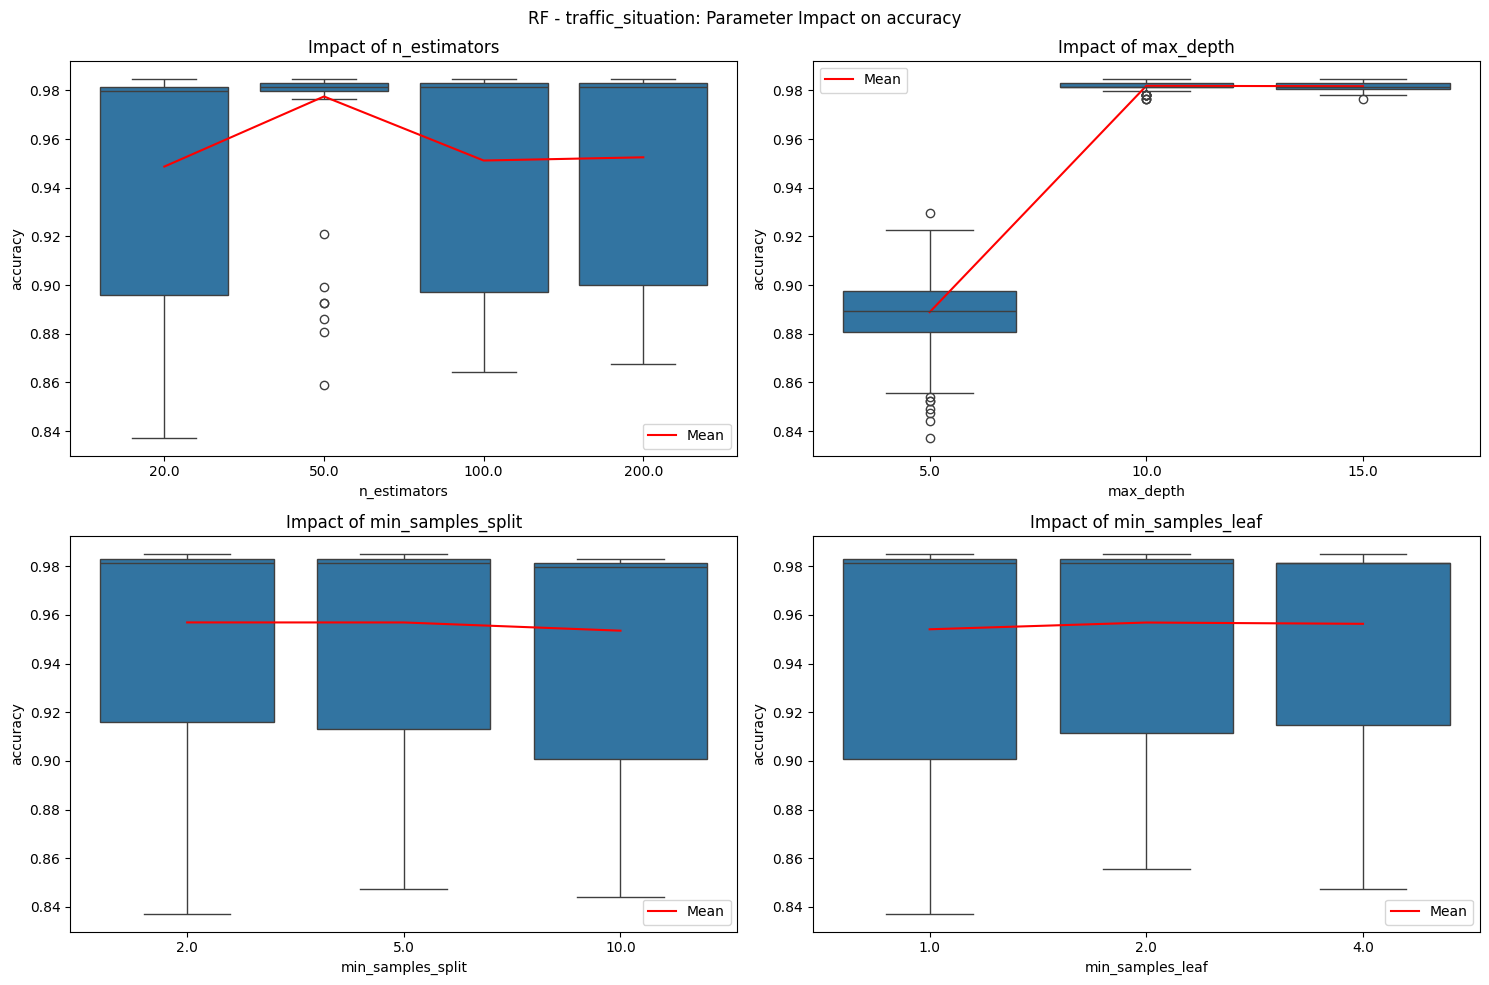


Dataset: wine_reviews

Parameter: n_estimators
                  mean       std  count
n_estimators                           
20.0          0.460422  0.088847    216
50.0          0.546374  0.062622    216
100.0         0.595484  0.039969    216
200.0         0.626504  0.025269    216

Parameter: max_depth
               mean       std  count
max_depth                           
5.0        0.513936  0.093529    288
10.0       0.566142  0.077623    288
15.0       0.591511  0.066847    288

Parameter: min_samples_split
                       mean       std  count
min_samples_split                           
2.0                0.557122  0.086068    288
5.0                0.557005  0.086333    288
10.0               0.557461  0.086720    288

Parameter: min_samples_leaf
                      mean       std  count
min_samples_leaf                           
1.0               0.556105  0.087533    288
2.0               0.563406  0.083761    288
4.0               0.552077  0.087392    288


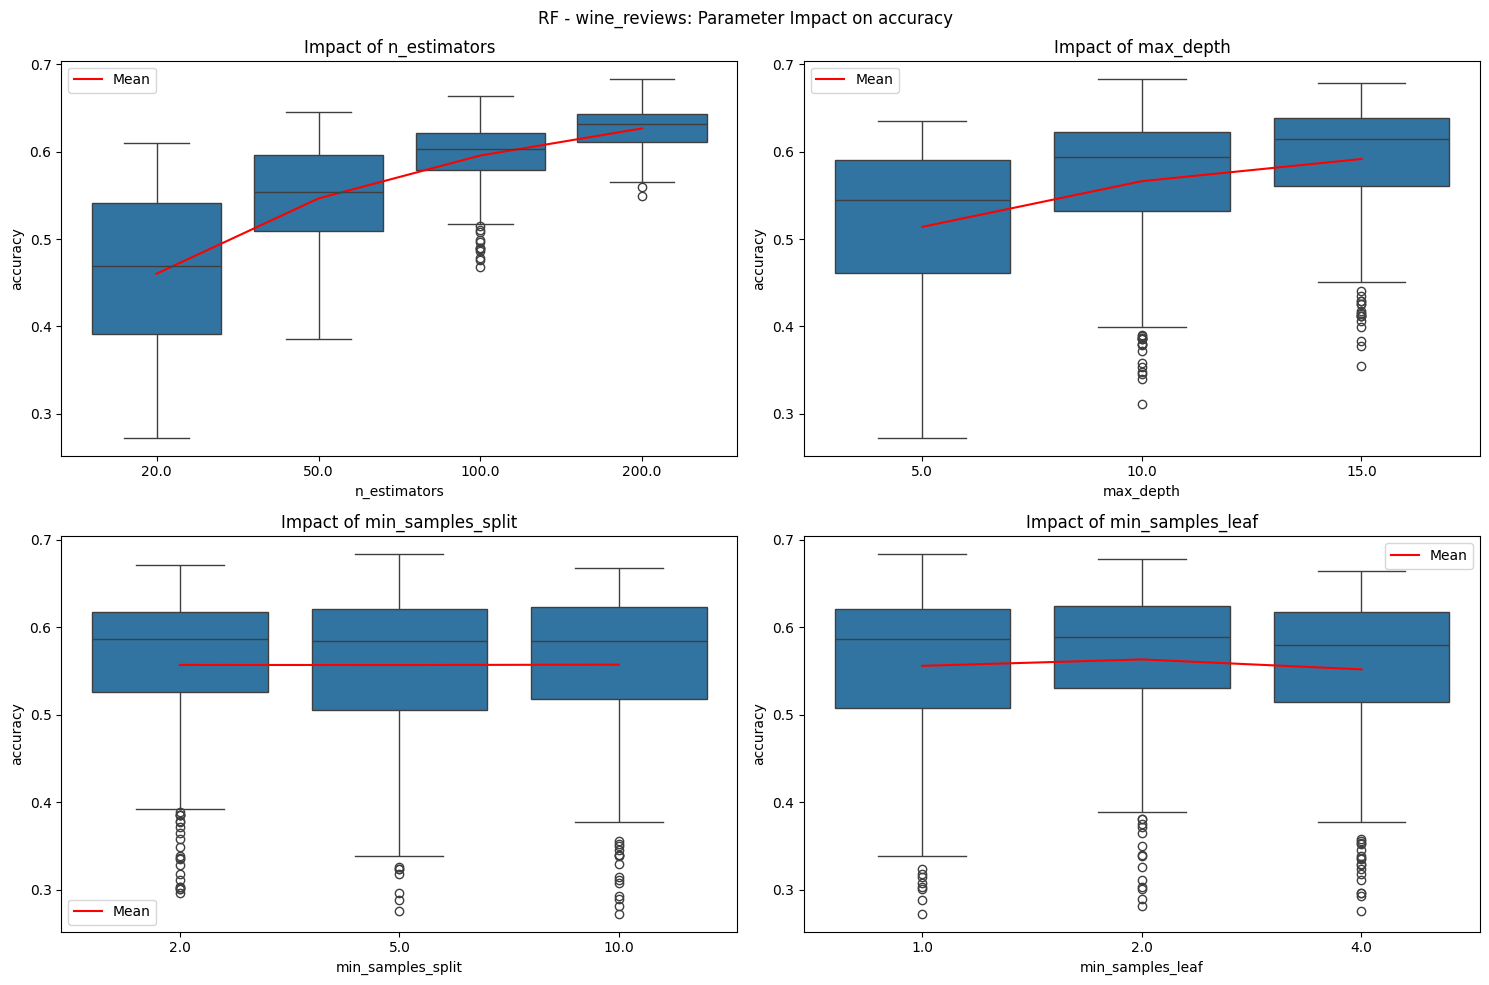


Analysis for KNN, models

Dataset: amazon_reviews


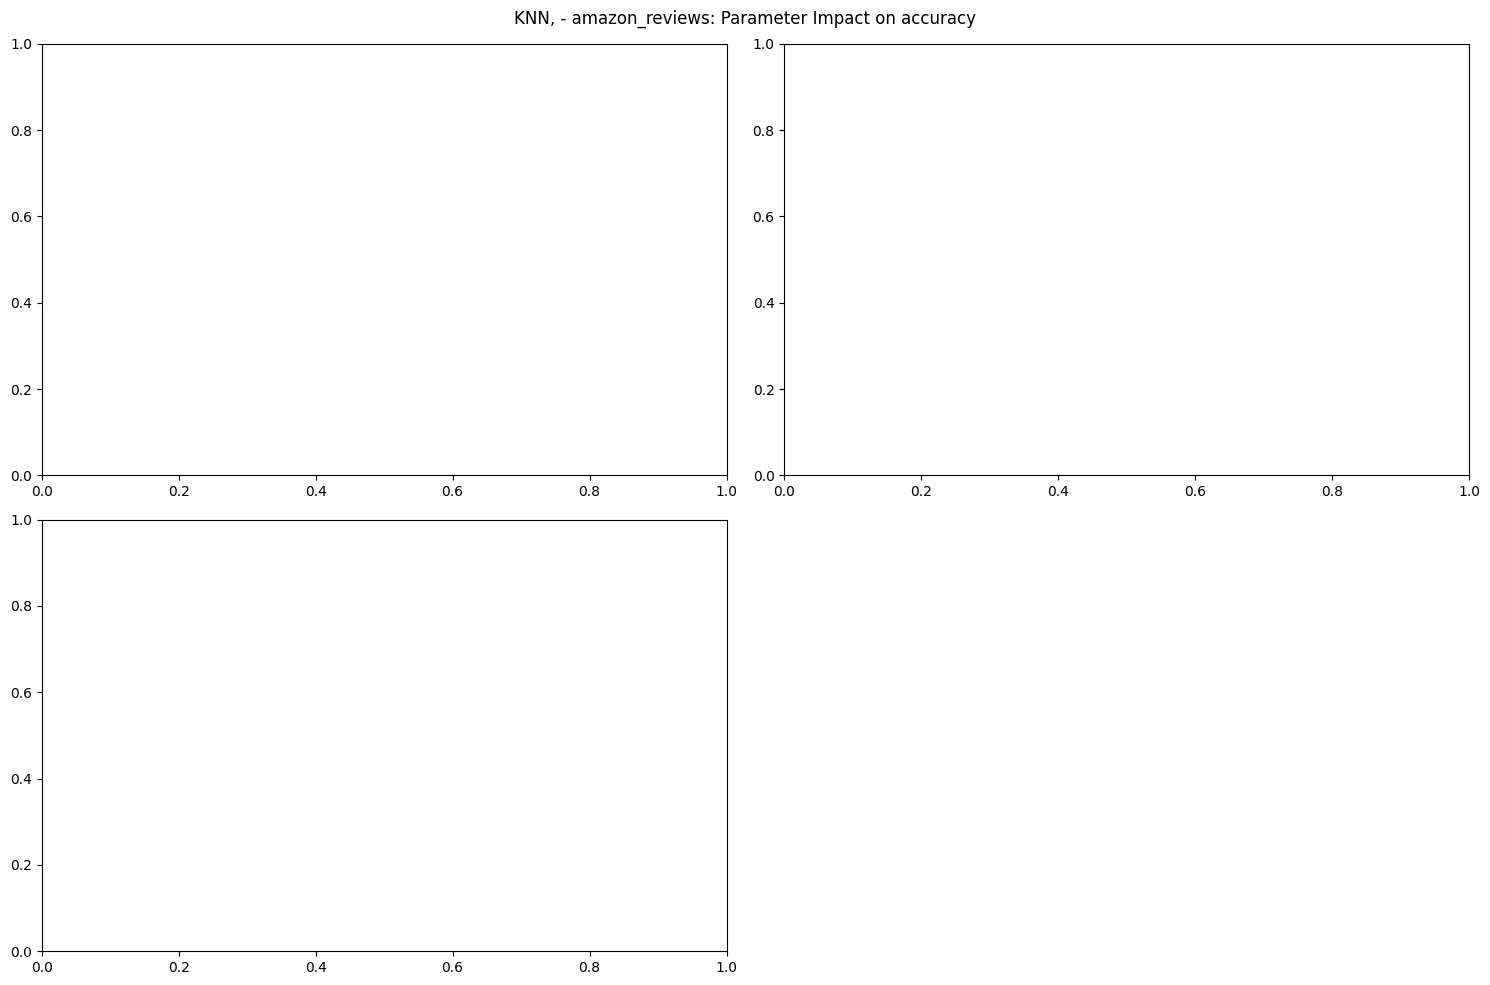


Dataset: congressional_voting


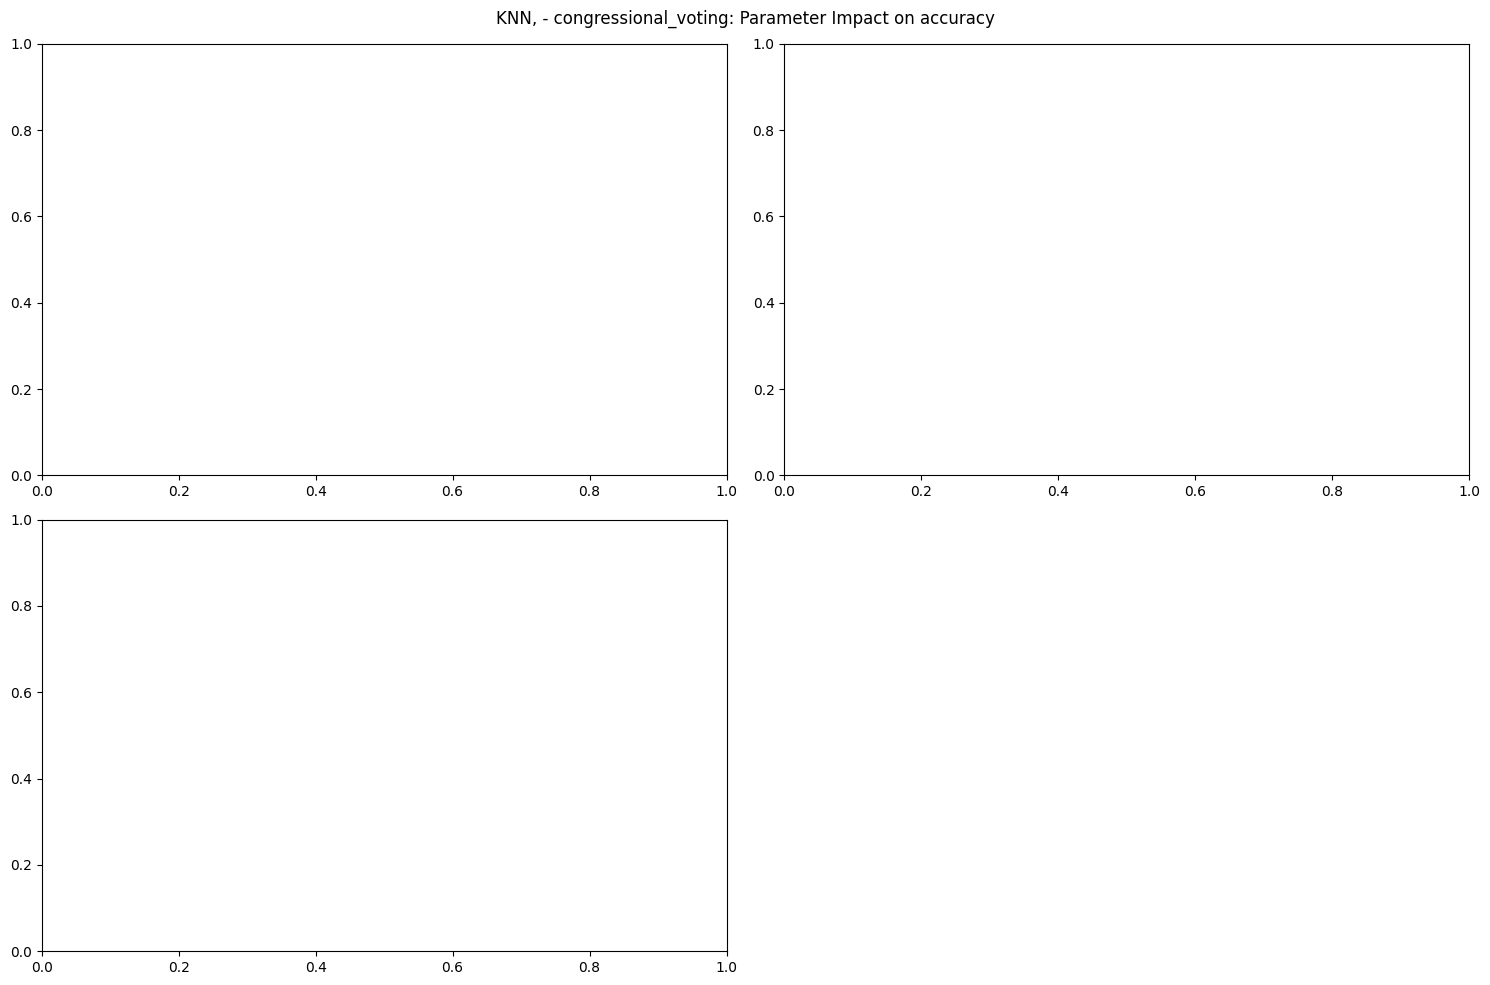


Dataset: traffic_situation


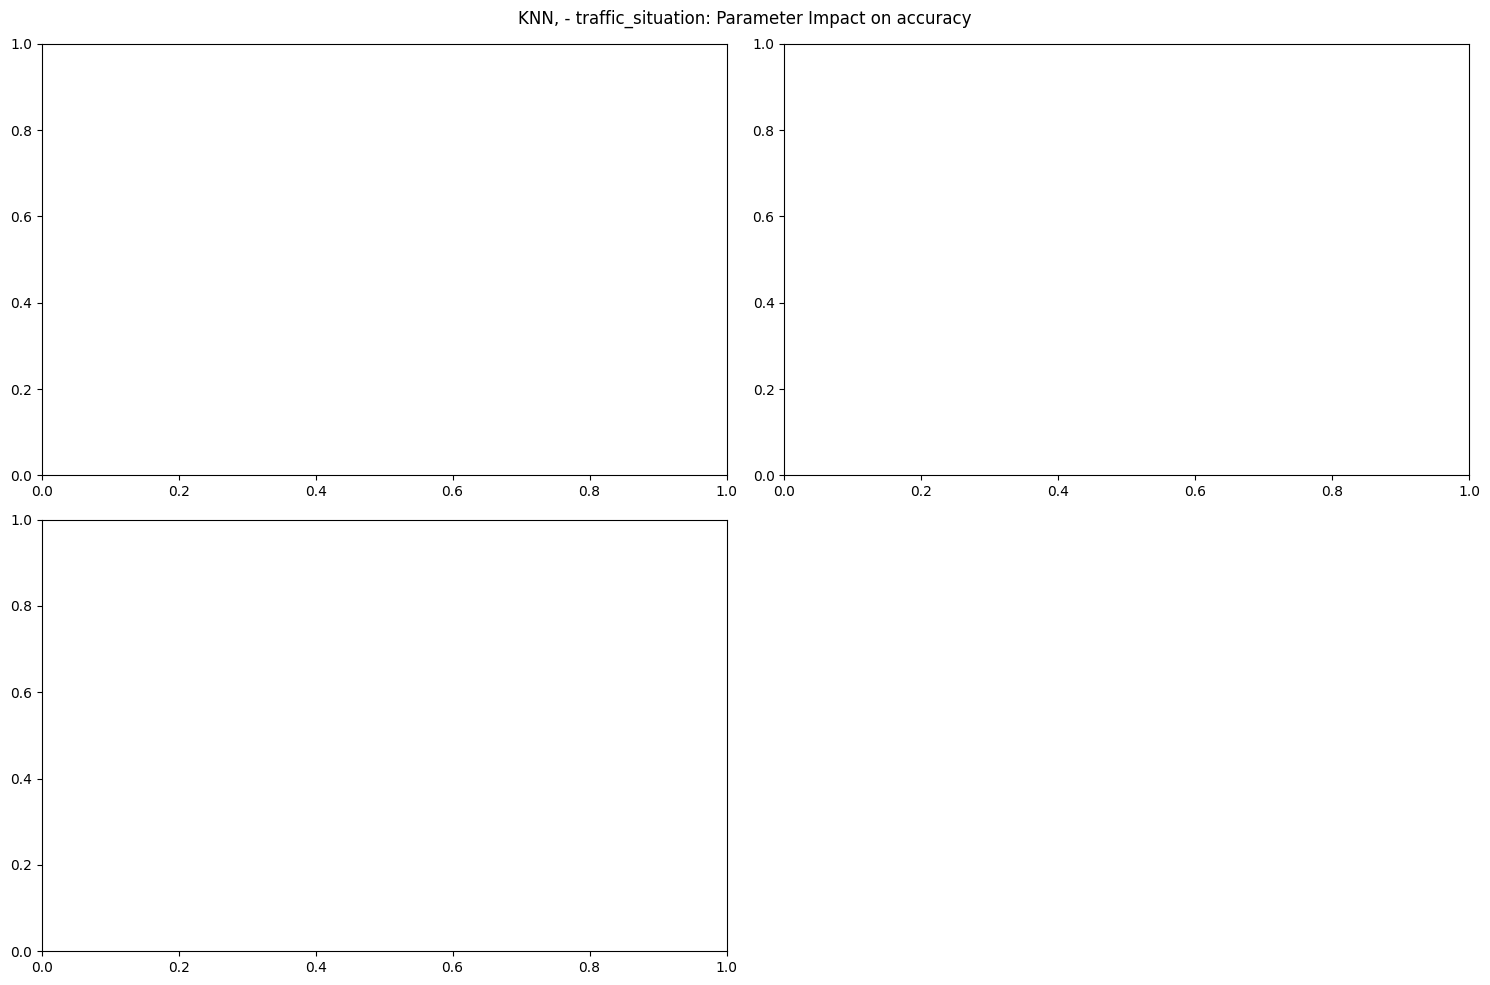


Dataset: wine_reviews


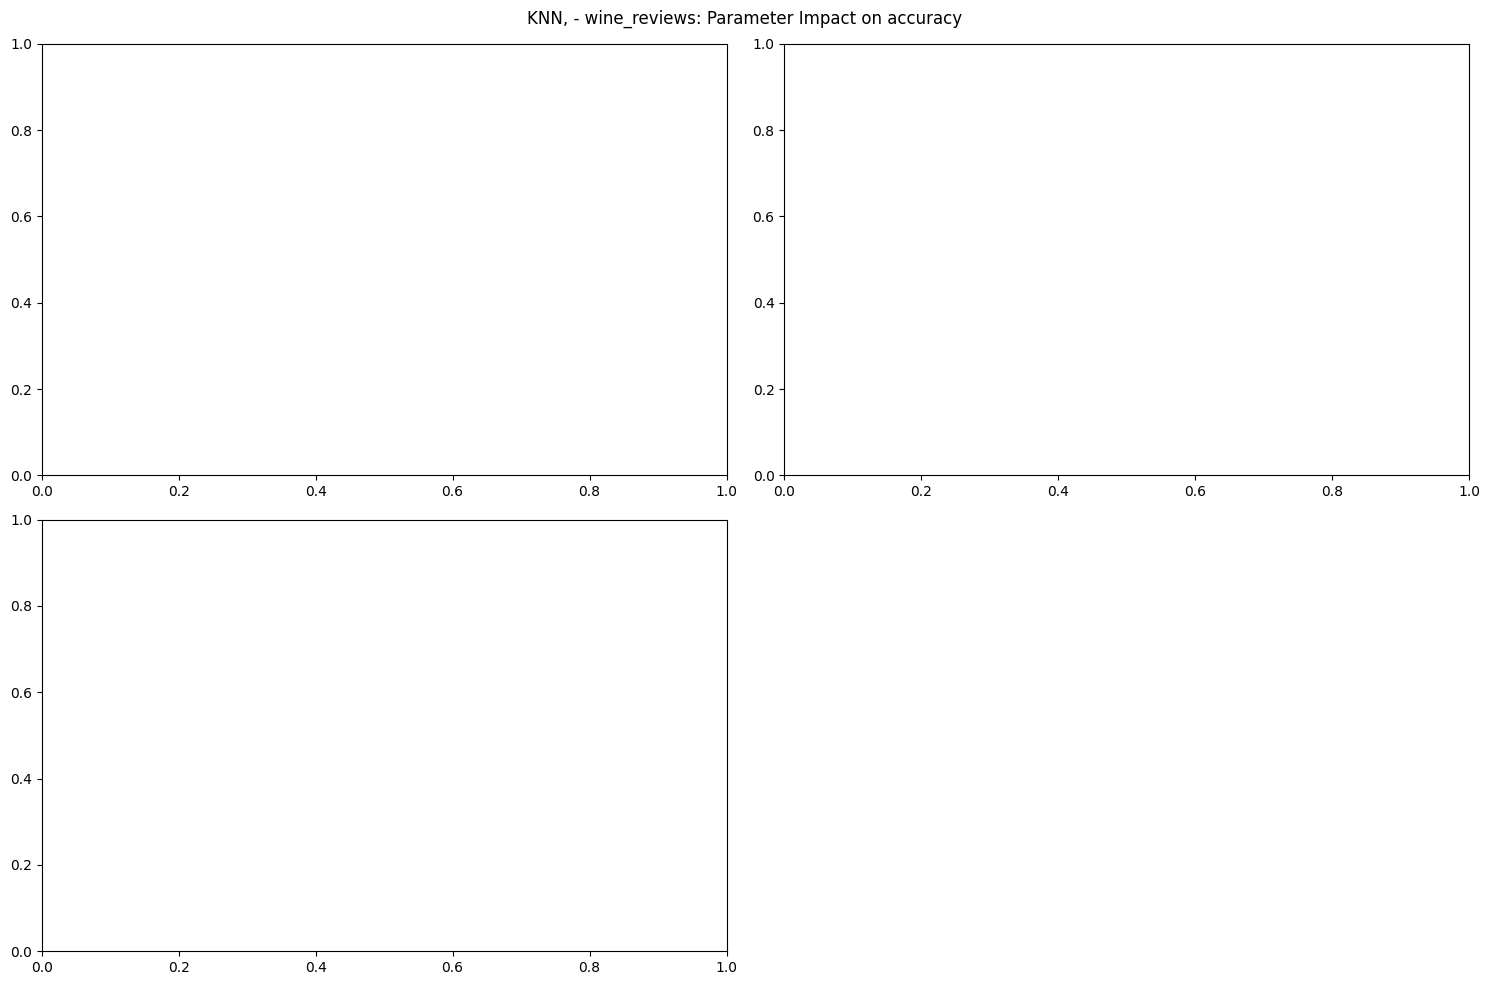


Analysis for KNN models

Dataset: amazon_reviews
No data available for this combination

Dataset: congressional_voting
No data available for this combination

Dataset: traffic_situation
No data available for this combination

Dataset: wine_reviews


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x1000 with 0 Axes>

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
parameter_maps = {
    'RF': ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'],
    'SVC': ['C', 'kernel', 'gamma'],
    'KNN,': ['n_neighbors', 'weights', 'metric']
}
def analyze_parameter_impact(df, metric='accuracy', figsize=(15, 10)):
    """
    Analyze how a specific metric changes with parameter variations for each model type and dataset.
    
    Args:
        df (pd.DataFrame): DataFrame containing the model results and parameters
        metric (str): Metric to analyze (e.g., 'accuracy', 'f1_weighted', etc.)
        figsize (tuple): Figure size for plots
    """
    # Get unique model types and datasets
    model_types = df['model_type'].unique()
    datasets = df['dataset'].unique()
    
    # Parameter mapping for each model type
    parameter_maps = {
        'RF': ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'],
        'SVC': ['C', 'kernel', 'gamma'],
        'KNN,': ['n_neighbors', 'weights', 'metric']
    }
    
    for model in model_types:
        print(f"\n{'='*50}")
        print(f"Analysis for {model} models")
        print(f"{'='*50}")
        
        model_df = df[df['model_type'] == model]
        parameters = parameter_maps.get(model, [])
        
        for dataset in datasets:
            print(f"\nDataset: {dataset}")
            dataset_df = model_df[model_df['dataset'] == dataset]
            
            if dataset_df.empty:
                print("No data available for this combination")
                continue
            
            # Create subplots for each parameter
            fig, axes = plt.subplots(nrows=(len(parameters) + 1) // 2, 
                                   ncols=2, 
                                   figsize=figsize)
            fig.suptitle(f'{model} - {dataset}: Parameter Impact on {metric}')
            axes = axes.flatten()
            
            for idx, param in enumerate(parameters):
                if param in dataset_df.columns:
                    # Create parameter vs metric plot
                    sns.boxplot(data=dataset_df, x=param, y=metric, ax=axes[idx])
                    axes[idx].set_title(f'Impact of {param}')
                    axes[idx].set_xlabel(param)
                    axes[idx].set_ylabel(metric)
                    
                    # Add mean line
                    means = dataset_df.groupby(param)[metric].mean()
                    axes[idx].plot(range(len(means)), means.values, 'r-', label='Mean')
                    axes[idx].legend()
                    
                    # Print statistical summary
                    print(f"\nParameter: {param}")
                    summary = dataset_df.groupby(param)[metric].agg(['mean', 'std', 'count'])
                    print(summary)
            
            # Remove empty subplots
            for idx in range(len(parameters), len(axes)):
                fig.delaxes(axes[idx])
            
            plt.tight_layout()
            plt.show()

def print_best_configurations(df, metric='accuracy'):
    """
    Print the best configurations for each model type and dataset combination.
    """
    for model in df['model_type'].unique():
        print(f"\n{'='*50}")
        print(f"Best configurations for {model}")
        print(f"{'='*50}")
        
        model_df = df[df['model_type'] == model]
        
        for dataset in model_df['dataset'].unique():
            print(f"\nDataset: {dataset}")
            dataset_df = model_df[model_df['dataset'] == dataset]
            
            # Get best configuration
            best_config = dataset_df.nlargest(1, metric).iloc[0]
            print(f"Best {metric}: {best_config[metric]:.4f}")
            print("Parameters:")
            for param in parameter_maps[model]:
                if param in best_config:
                    print(f"- {param}: {best_config[param]}")

# Usage example
# Assuming your DataFrame is called 'parsed_df' and contains the parsed parameters
analyze_parameter_impact(all_model_data, metric='accuracy')
print_best_configurations(all_model_data, metric='accuracy')

# You can also analyze other metrics
# analyze_parameter_impact(parsed_df, metric='f1_weighted')

In [66]:
def analyze_parameter_correlations(df, metric='accuracy'):
    """
    Analyze correlations between parameters and metrics.
    """
    for model in df['model_type'].unique():
        model_df = df[df['model_type'] == model]
        numeric_params = model_df.select_dtypes(include=['int64', 'float64']).columns
        
        for dataset in model_df['dataset'].unique():
            dataset_df = model_df[model_df['dataset'] == dataset]
            
            # Create correlation matrix
            corr_matrix = dataset_df[list(numeric_params) + [metric]].corr()
            
            # Plot correlation heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
            plt.title(f'Parameter Correlations - {model} - {dataset}')
            plt.tight_layout()
            plt.show()
def analyze_parameter_interactions(df, metric='accuracy', param1=None, param2=None):
    """
    Analyze interactions between two parameters.
    """
    for model in df['model_type'].unique():
        model_df = df[df['model_type'] == model]
        
        if param1 is None or param2 is None:
            parameters = parameter_maps[model]
            param1, param2 = parameters[0], parameters[1]
        
        for dataset in model_df['dataset'].unique():
            dataset_df = model_df[model_df['dataset'] == dataset]
            
            # Create interaction plot
            plt.figure(figsize=(12, 8))
            sns.scatterplot(data=dataset_df, x=param1, y=param2, hue=metric, size=metric)
            plt.title(f'Parameter Interaction - {model} - {dataset}')
            plt.tight_layout()
            plt.show()

In [67]:
from scipy import stats

def analyze_parameter_significance(df, metric='accuracy'):
    """
    Perform statistical tests to determine parameter significance.
    """
    for model in df['model_type'].unique():
        print(f"\nStatistical Analysis for {model}")
        model_df = df[df['model_type'] == model]
        parameters = parameter_maps[model]
        
        for dataset in model_df['dataset'].unique():
            print(f"\nDataset: {dataset}")
            dataset_df = model_df[model_df['dataset'] == dataset]
            
            for param in parameters:
                if param in dataset_df.columns:
                    # Perform one-way ANOVA
                    groups = [group[metric].values for name, group in dataset_df.groupby(param)]
                    f_stat, p_val = stats.f_oneway(*groups)
                    
                    print(f"\nParameter: {param}")
                    print(f"F-statistic: {f_stat:.4f}")
                    print(f"p-value: {p_val:.4f}")
                    print("Significant" if p_val < 0.05 else "Not significant")

# Usage
analyze_parameter_significance(parsed_df)


Statistical Analysis for SVC


KeyError: 'SVC'

# ANAL Y SIS


Analysis for dataset: amazon_reviews


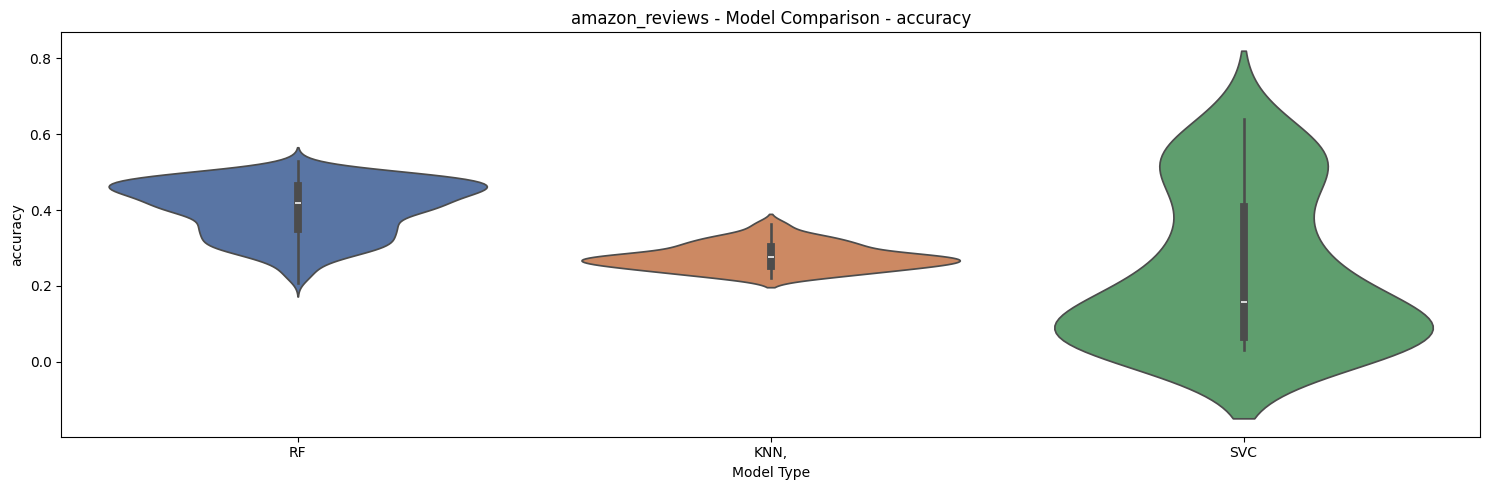


Model Comparison Statistics
------------------------------

Metric: accuracy

Summary Statistics:
                mean       std  count
model_type                           
KNN,        0.276931  0.033484    126
RF          0.405211  0.070666    864
SVC         0.239049  0.198231     52

Analysis for dataset: congressional_voting


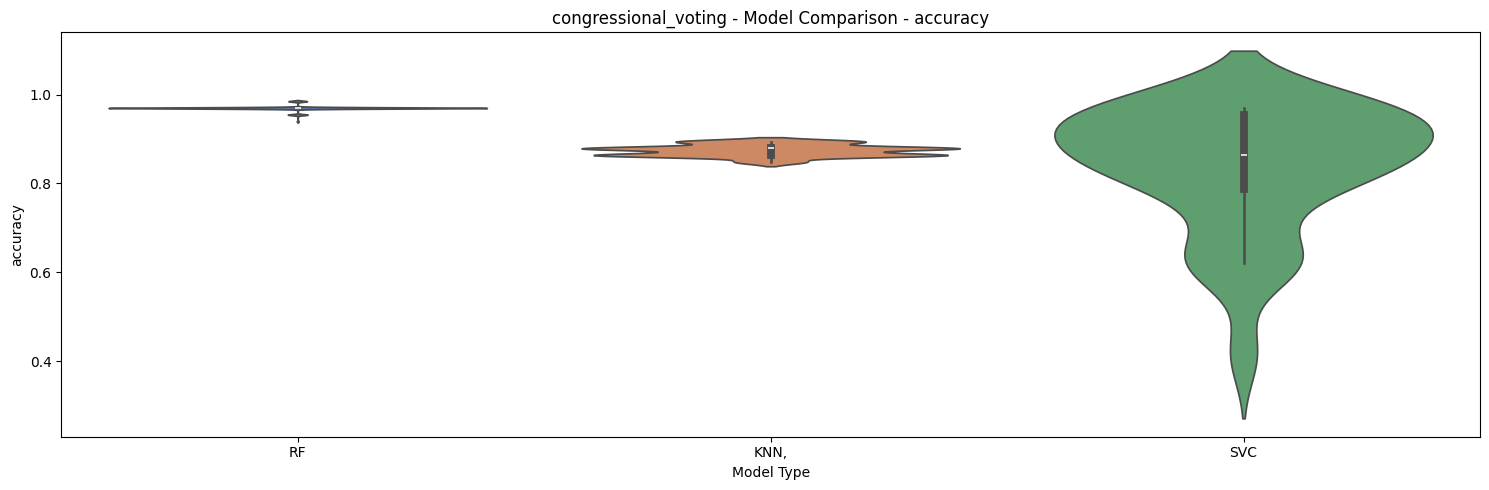


Model Comparison Statistics
------------------------------

Metric: accuracy

Summary Statistics:
                mean       std  count
model_type                           
KNN,        0.874098  0.013064    126
RF          0.969504  0.005023    864
SVC         0.832922  0.142003     52

Analysis for dataset: traffic_situation


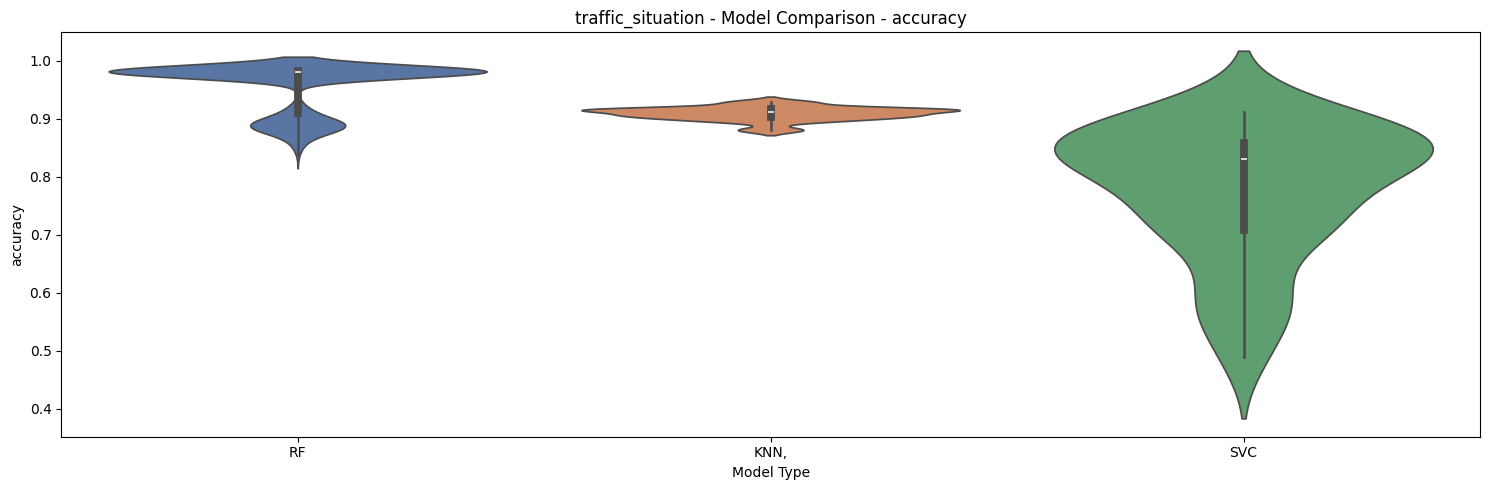


Model Comparison Statistics
------------------------------

Metric: accuracy

Summary Statistics:
                mean       std  count
model_type                           
KNN,        0.909316  0.011803    126
RF          0.955788  0.042597    796
SVC         0.774574  0.115610     48

Analysis for dataset: wine_reviews


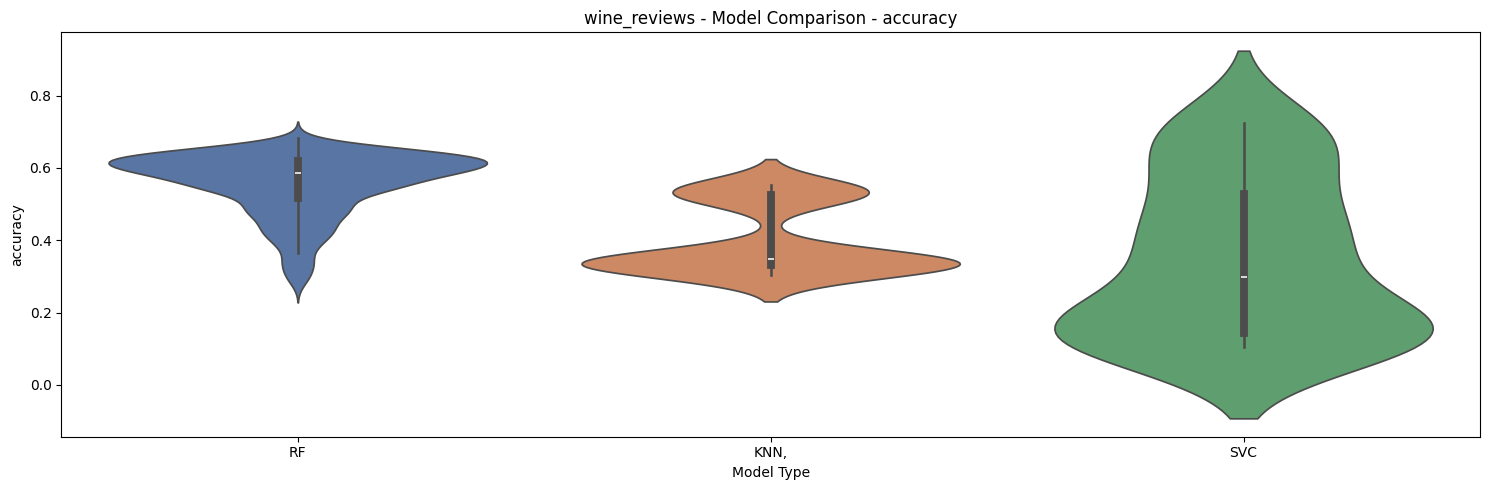


Model Comparison Statistics
------------------------------

Metric: accuracy

Summary Statistics:
                mean       std  count
model_type                           
KNN,        0.400593  0.095038    126
RF          0.557196  0.086274    864
SVC         0.343509  0.218923     52


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [81]:
def analyze_model_comparison_by_dataset(df, models, metrics, datasets, statistical_test='friedman'):
    """
    Compare performance across different models for each dataset.
    
    Args:
        df: DataFrame containing all model results
        models: List of models to compare
        metrics: List of metrics to analyze
        datasets: List of datasets to analyze
        statistical_test: Type of statistical test to perform
    """
    for dataset in datasets:
        print(f"\n{'='*50}")
        print(f"Analysis for dataset: {dataset}")
        print(f"{'='*50}")
        
        # Filter data for current dataset
        dataset_df = df[df['dataset'] == dataset]
        
        n_metrics = len(metrics)
        plt.figure(figsize=(15, 5*n_metrics))
        
        for i, metric in enumerate(metrics):
            plt.subplot(n_metrics, 1, i+1)
            
            # Create violin plots for model comparison
            sns.violinplot(data=dataset_df[dataset_df['model_type'].isin(models)], 
                          x='model_type', 
                          y=metric, 
                          palette='deep')
            
            plt.title(f'{dataset} - Model Comparison - {metric}')
            plt.xlabel('Model Type')
            plt.ylabel(metric)
        
        plt.tight_layout()
        plt.show()
        
        # Statistical analysis
        print("\nModel Comparison Statistics")
        print("-"*30)
        
        for metric in metrics:
            print(f"\nMetric: {metric}")
            
            # Summary statistics
            summary = dataset_df[dataset_df['model_type'].isin(models)].groupby('model_type')[metric].agg(['mean', 'std', 'count'])
            print("\nSummary Statistics:")
            print(summary)
            

# Usage:
datasets = ['amazon_reviews', 'congressional_voting', 'traffic_situation', 'wine_reviews']
models = ['RF', 'KNN,', 'SVC']
metrics = ['accuracy']

analyze_model_comparison_by_dataset(
    df=all_model_data,
    models=models,
    metrics=metrics,
    datasets=datasets,
    statistical_test='friedman'
)

# If you want to save the plots, you can modify the function:
def analyze_model_comparison_by_dataset(df, models, metrics, datasets, statistical_test='friedman', save_plots=False):
    for dataset in datasets:
        # ... (previous code) ...
        
        if save_plots:
            plt.savefig(f'model_comparison_{dataset}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # ... (rest of the code) ...

# Usage with plot saving:
analyze_model_comparison_by_dataset(
    df=all_model_data,
    models=models,
    metrics=metrics,
    datasets=datasets,
    statistical_test='friedman',
    save_plots=True
)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import friedmanchisquare
import warnings
warnings.filterwarnings('ignore')

def analyze_metric_comparison(df, metrics, test='wilcoxon'):
    """
    Compare different distance metrics for kNN.
    
    Args:
        df: DataFrame containing kNN results
        metrics: List of distance metrics to compare
        test: Statistical test to use ('wilcoxon' or 'friedman')
    """
    plt.figure(figsize=(12, 6))
    
    # Create box plots for each metric
    sns.boxplot(data=df[df['metric'].isin(metrics)], 
                x='metric', 
                y='accuracy', 
                palette='Set3')
    
    plt.title('Comparison of Distance Metrics in kNN')
    plt.xlabel('Distance Metric')
    plt.ylabel('Accuracy')
    
    # Statistical tests
    print("\nStatistical Analysis of Distance Metrics")
    print("="*50)
    
    # Prepare data for statistical testing
    metric_groups = [df[df['metric'] == m]['accuracy'].values for m in metrics]
    
    if test == 'wilcoxon':
        # Pairwise Wilcoxon tests
        for i in range(len(metrics)):
            for j in range(i+1, len(metrics)):
                stat, p_val = stats.wilcoxon(metric_groups[i], metric_groups[j])
                print(f"\n{metrics[i]} vs {metrics[j]}:")
                print(f"Wilcoxon statistic: {stat:.4f}")
                print(f"p-value: {p_val:.4f}")
    
    elif test == 'friedman':
        # Friedman test for all metrics
        stat, p_val = friedmanchisquare(*metric_groups)
        print("\nFriedman Test Results:")
        print(f"Statistic: {stat:.4f}")
        print(f"p-value: {p_val:.4f}")
    
    plt.show()

def analyze_kernel_performance(df, kernels, metric='accuracy'):
    """
    Analyze performance of different SVM kernels.
    
    Args:
        df: DataFrame containing SVM results
        kernels: List of kernels to compare
        metric: Performance metric to analyze
    """
    plt.figure(figsize=(15, 5))
    
    # Create subplot for each analysis
    plt.subplot(1, 2, 1)
    # Box plots for kernel comparison
    sns.boxplot(data=df[df['kernel'].isin(kernels)], 
                x='kernel', 
                y=metric, 
                palette='viridis')
    plt.title('Kernel Performance Comparison')
    
    plt.subplot(1, 2, 2)
    # Violin plots for distribution visualization
    sns.violinplot(data=df[df['kernel'].isin(kernels)], 
                  x='kernel', 
                  y=metric, 
                  palette='viridis')
    plt.title('Kernel Performance Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical analysis
    print("\nKernel Performance Statistics")
    print("="*50)
    
    # Summary statistics
    summary = df[df['kernel'].isin(kernels)].groupby('kernel')[metric].agg(['mean', 'std', 'count'])
    print("\nSummary Statistics:")
    print(summary)
    
    # ANOVA test
    kernel_groups = [df[df['kernel'] == k][metric].values for k in kernels]
    f_stat, p_val = stats.f_oneway(*kernel_groups)
    print("\nANOVA Test Results:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

def analyze_parameter_scale(df, param, scale='log', metric='accuracy'):
    """
    Analyze parameter performance across different scales.
    
    Args:
        df: DataFrame containing model results
        param: Parameter to analyze
        scale: Scale type ('log' or 'linear')
        metric: Performance metric to analyze
    """
    plt.figure(figsize=(12, 6))
    
    # Transform parameter values based on scale
    if scale == 'log':
        param_values = np.log10(df[param])
        plt.xscale('log')
    else:
        param_values = df[param]
    
    # Scatter plot with trend line
    sns.regplot(x=df[param], 
                y=df[metric], 
                scatter_kws={'alpha':0.5}, 
                line_kws={'color': 'red'})
    
    plt.title(f'{param} vs {metric} ({scale} scale)')
    plt.xlabel(f'{param} value ({scale} scale)')
    plt.ylabel(metric)
    
    # Add correlation analysis
    correlation = df[[param, metric]].corr().iloc[0,1]
    plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}', 
             transform=plt.gca().transAxes)
    
    plt.show()
    
    # Parameter value distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(param_values, bins=30)
    plt.title(f'Distribution of {param} values')
    plt.xlabel(f'{param} value ({scale} scale)')
    plt.show()

def analyze_model_comparison(df, models, metrics, statistical_test='friedman'):
    """
    Compare performance across different models.
    
    Args:
        df: DataFrame containing all model results
        models: List of models to compare
        metrics: List of metrics to analyze
        statistical_test: Type of statistical test to perform
    """
    n_metrics = len(metrics)
    plt.figure(figsize=(15, 5*n_metrics))
    
    for i, metric in enumerate(metrics):
        plt.subplot(n_metrics, 1, i+1)
        
        # Create violin plots for model comparison
        sns.violinplot(data=df[df['model_type'].isin(models)], 
                      x='model_type', 
                      y=metric, 
                      palette='deep')
        
        plt.title(f'Model Comparison - {metric}')
        plt.xlabel('Model Type')
        plt.ylabel(metric)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical analysis
    print("\nModel Comparison Statistics")
    print("="*50)
    
    for metric in metrics:
        print(f"\nMetric: {metric}")
        
        # Summary statistics
        summary = df[df['model_type'].isin(models)].groupby('model_type')[metric].agg(['mean', 'std', 'count'])
        print("\nSummary Statistics:")
        print(summary)
        
        # Statistical test
        if statistical_test == 'friedman':
            model_groups = [df[df['model_type'] == m][metric].values for m in models]
            stat, p_val = friedmanchisquare(*model_groups)
            print("\nFriedman Test Results:")
            print(f"Statistic: {stat:.4f}")
            print(f"p-value: {p_val:.4f}")

def analyze_dataset_impact(df, characteristics, models):
    """
    Analyze how dataset characteristics affect model performance.
    
    Args:
        df: DataFrame containing all results
        characteristics: List of dataset characteristics to analyze
        models: List of models to compare
    """
    plt.figure(figsize=(15, 5*len(characteristics)))
    
    for i, char in enumerate(characteristics):
        plt.subplot(len(characteristics), 1, i+1)
        
        # Create scatter plots for each model
        for model in models:
            model_data = df[df['model_type'] == model]
            sns.scatterplot(data=model_data, 
                          x=char, 
                          y='accuracy', 
                          label=model, 
                          alpha=0.6)
            
            # Add trend line
            sns.regplot(data=model_data, 
                       x=char, 
                       y='accuracy', 
                       scatter=False, 
                       label=f'{model} trend')
        
        plt.title(f'Impact of {char} on Model Performance')
        plt.xlabel(char)
        plt.ylabel('Accuracy')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Correlation analysis
    print("\nCorrelation Analysis")
    print("="*50)
    
    for model in models:
        print(f"\nModel: {model}")
        model_data = df[df['model_type'] == model]
        
        for char in characteristics:
            correlation = model_data[[char, 'accuracy']].corr().iloc[0,1]
            print(f"Correlation with {char}: {correlation:.4f}")

# Usage examples:
# Assuming your DataFrame is called 'results_df'

# Compare kNN distance metrics
analyze_metric_comparison(
    all_model_data[all_model_data['model_type'] == 'KNN'],
    metrics=['euclidean', 'manhattan', 'minkowski'],
    test='wilcoxon'
)

# Compare SVM kernels
analyze_kernel_performance(
    all_model_data[all_model_data['model_type'] == 'SVM'],
    kernels=['linear', 'rbf', 'poly'],
    metric='accuracy'
)

# Analyze SVM C parameter
analyze_parameter_scale(
    all_model_data[all_model_data['model_type'] == 'SVM'],
    param='C',
    scale='log',
    metric='accuracy'
)

# Compare all models
analyze_model_comparison(
    all_model_data,
    models=['RF', 'KNN', 'SVM'],
    metrics=['accuracy', 'f1_weighted'],
    statistical_test='friedman'
)

# Analyze dataset impact
analyze_dataset_impact(
    all_model_data,
    characteristics=['n_samples', 'n_features', 'class_balance'],
    models=['RF', 'KNN', 'SVM']
)

KeyError: 'metric'

<Figure size 1200x600 with 0 Axes>

# RF

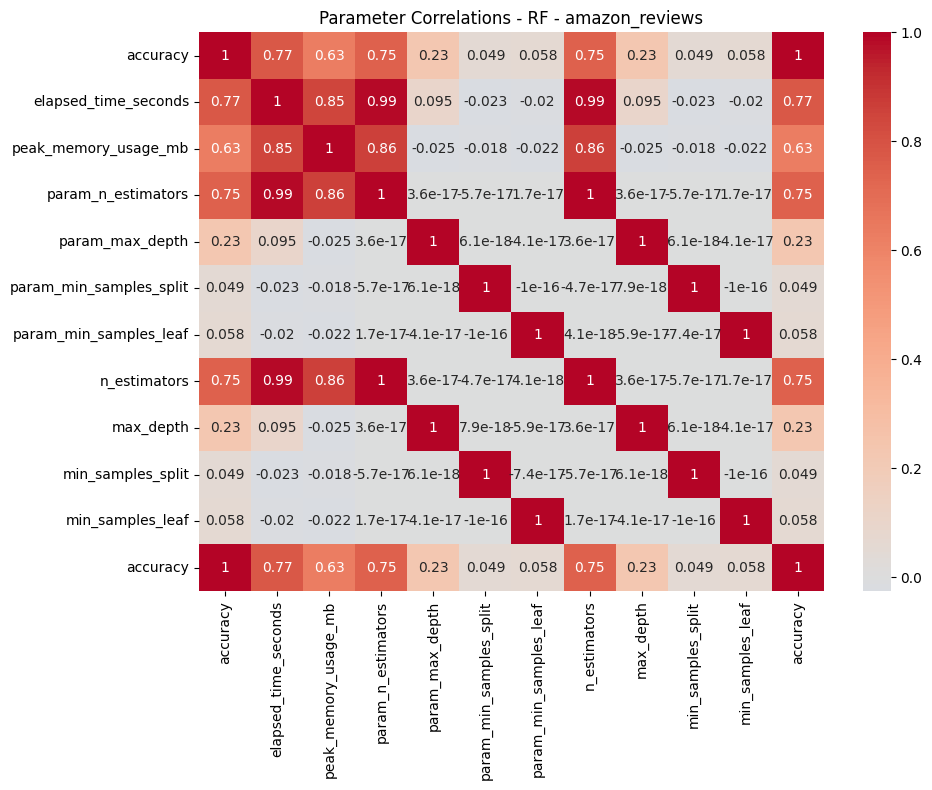

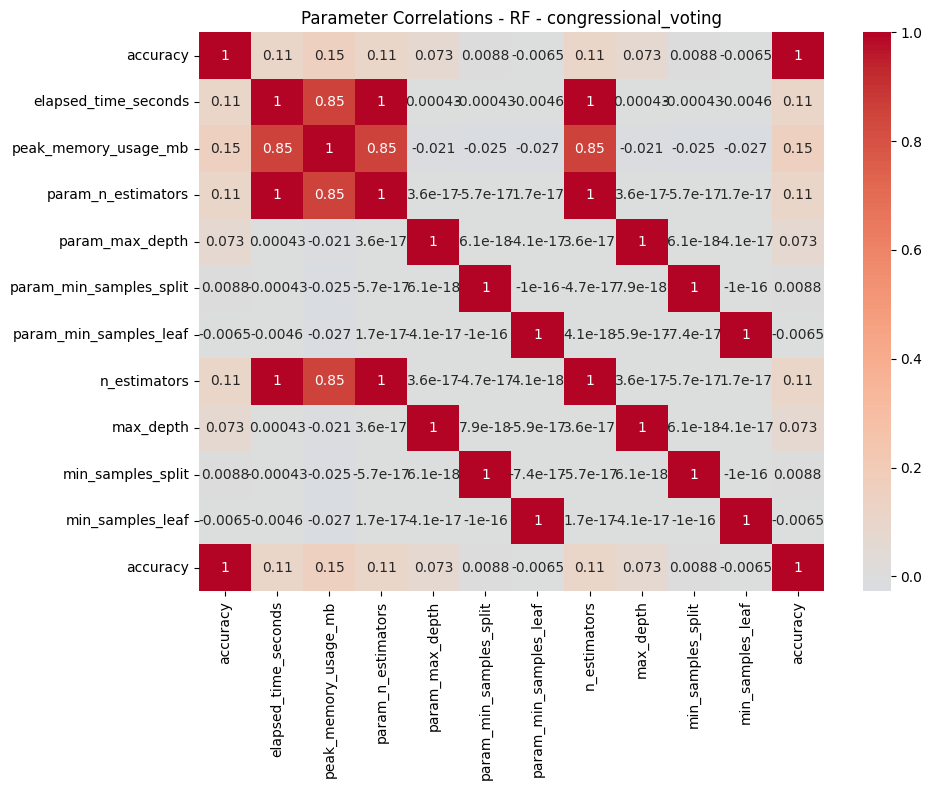

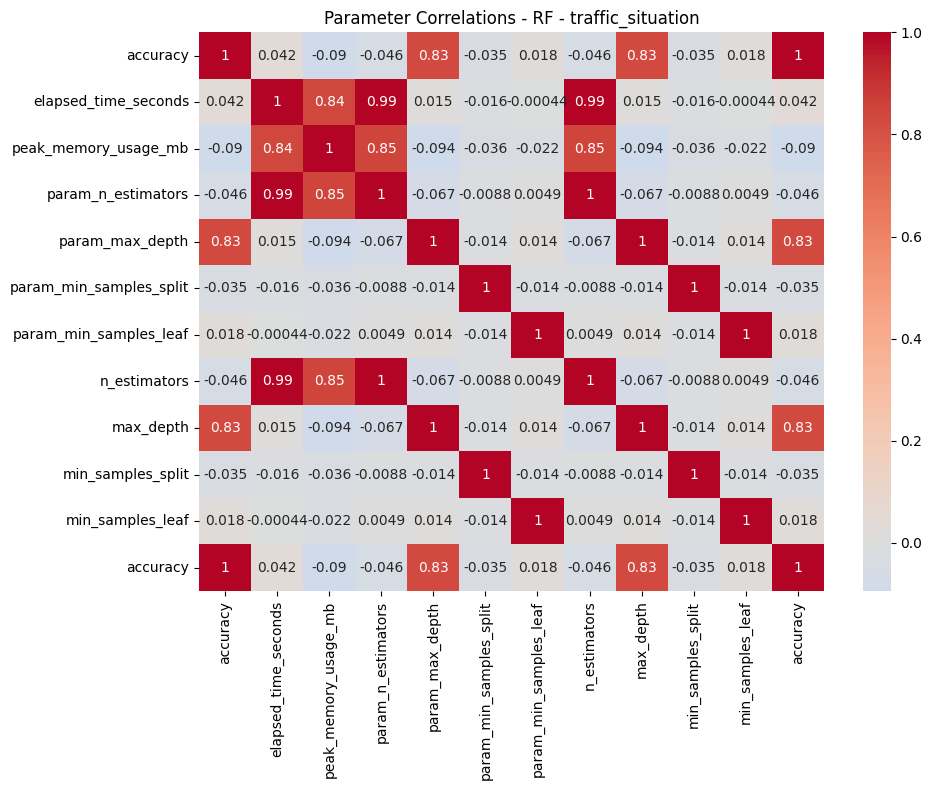

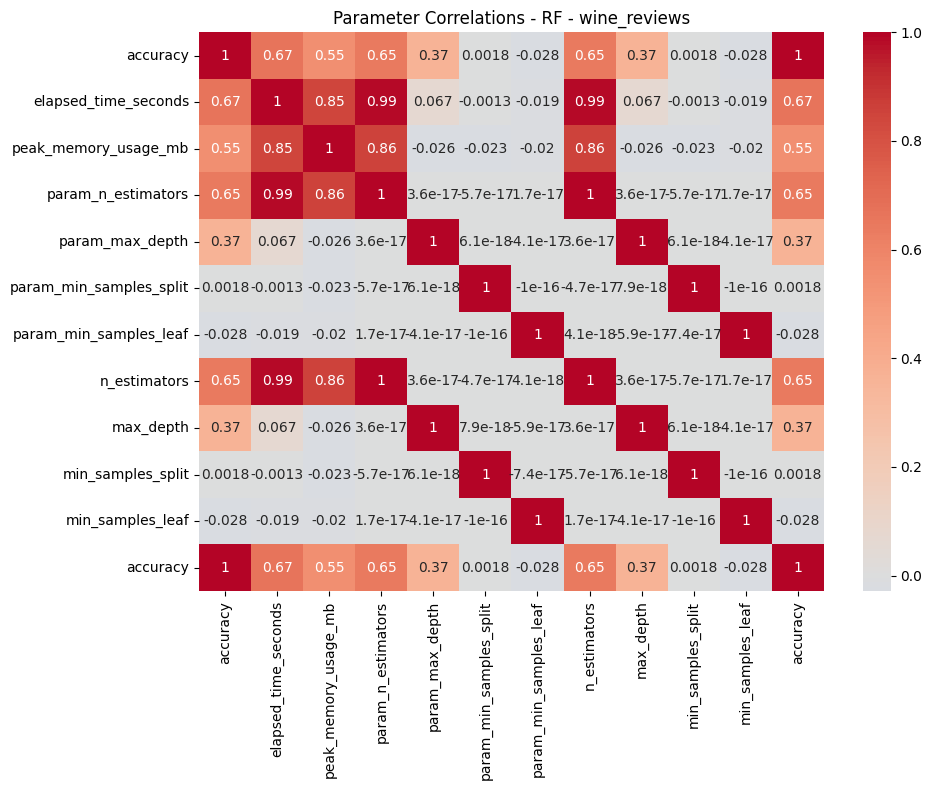


Statistical Analysis for RF

Dataset: amazon_reviews

Parameter: n_estimators
F-statistic: 776.4236
p-value: 0.0000
Significant

Parameter: max_depth
F-statistic: 28.9269
p-value: 0.0000
Significant

Parameter: min_samples_split
F-statistic: 1.0370
p-value: 0.3550
Not significant

Parameter: min_samples_leaf
F-statistic: 1.5841
p-value: 0.2057
Not significant

Dataset: congressional_voting

Parameter: n_estimators
F-statistic: 4.8769
p-value: 0.0023
Significant

Parameter: max_depth
F-statistic: 3.0576
p-value: 0.0475
Significant

Parameter: min_samples_split
F-statistic: 0.4522
p-value: 0.6364
Not significant

Parameter: min_samples_leaf
F-statistic: 0.0735
p-value: 0.9291
Not significant

Dataset: traffic_situation

Parameter: n_estimators
F-statistic: 17.0602
p-value: 0.0000
Significant

Parameter: max_depth
F-statistic: 9889.0322
p-value: 0.0000
Significant

Parameter: min_samples_split
F-statistic: 0.5651
p-value: 0.5686
Not significant

Parameter: min_samples_leaf
F-statistic: 0

In [75]:
# Key parameters to analyze for RF:
rf_params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']

# Correlation Analysis
analyze_parameter_correlations(
    rf_data,  # DataFrame filtered for RF models
    metric='accuracy',
    #params=rf_params  # Focus on these specific parameters
)

# Significance Tests for RF
# 1. ANOVA test for numerical parameters
analyze_parameter_significance(
    rf_data, 
    #params=['n_estimators', 'max_depth'],
    metric='accuracy'
)

# 2. Chi-square test for categorical parameters (like criterion)
# 3. Friedman test for comparing different parameter combinations

# KNN

In [82]:
# Key parameters for kNN:
knn_params = ['n_neighbors', 'weights', 'metric']

# Parameter Impact Analysis
analyze_parameter_impact(
    knn_data,
    metric='accuracy',
    #focus_params=['n_neighbors'],  # Most important parameter
    #plot_type='line'  # Better for showing k-value progression
)

# Non-parametric tests for different distance metrics
analyze_metric_comparison(
    knn_data,
    metrics=['euclidean', 'manhattan', 'minkowski'],
    test='wilcoxon'  # Paired comparison of distance metrics
)


Analysis for KNN, models

Dataset: amazon_reviews


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x1000 with 0 Axes>

# SVM

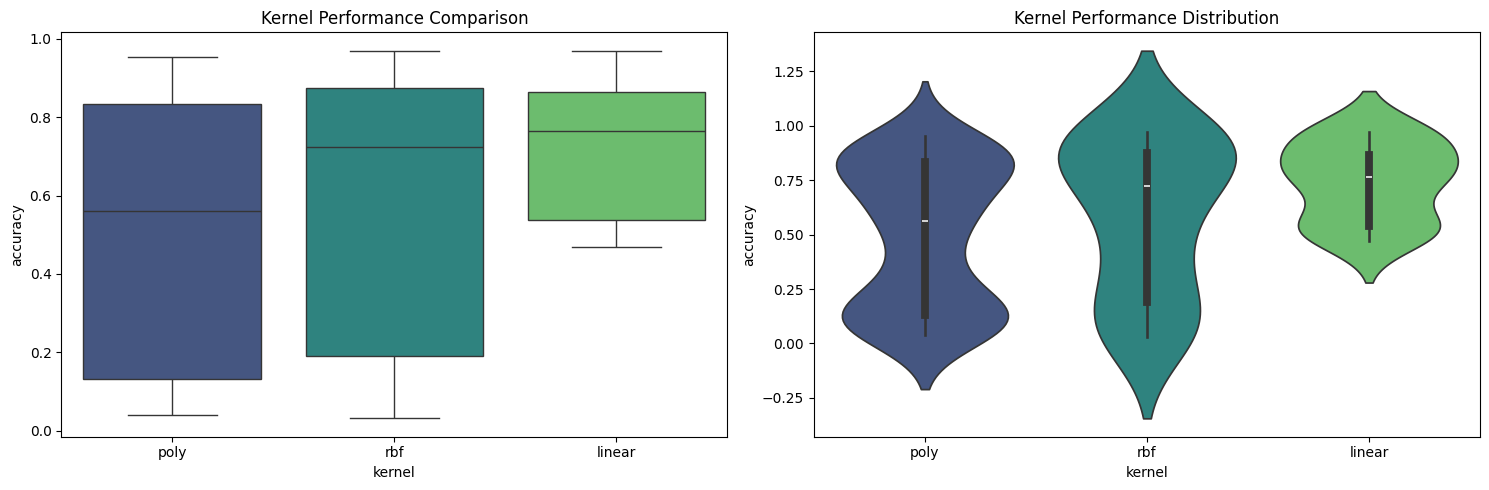


Kernel Performance Statistics

Summary Statistics:
            mean       std  count
kernel                           
linear  0.741214  0.179332     24
poly    0.495788  0.325680    120
rbf     0.580523  0.354532     24

ANOVA Test Results:
F-statistic: 6.3157
p-value: 0.0023


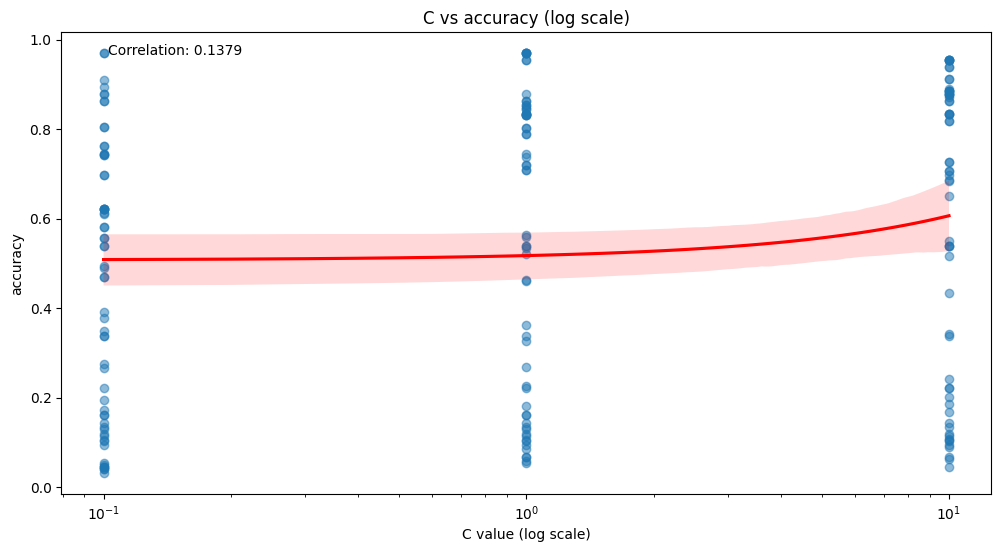

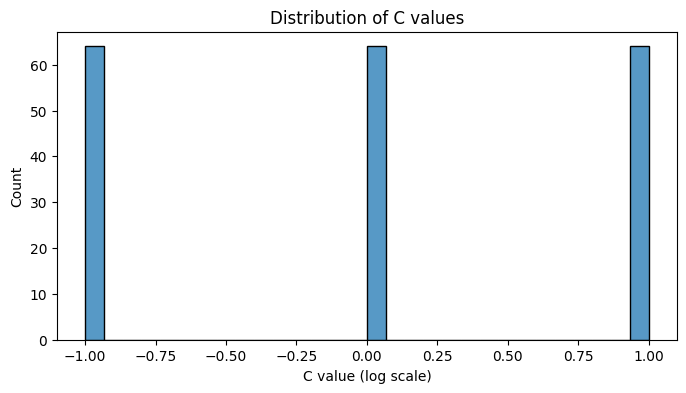

In [71]:
# Key parameters for SVM:
svm_params = ['C', 'kernel', 'gamma']

# Kernel Performance Comparison
analyze_kernel_performance(
    svc_data,
    kernels=['rbf', 'linear', 'poly'],
    metric='accuracy'
)

# Parameter Scale Analysis
analyze_parameter_scale(
    svc_data,
    param='C',
    scale='log',  # C and gamma often need log scale analysis
    metric='accuracy'
)

# ALL MODELS

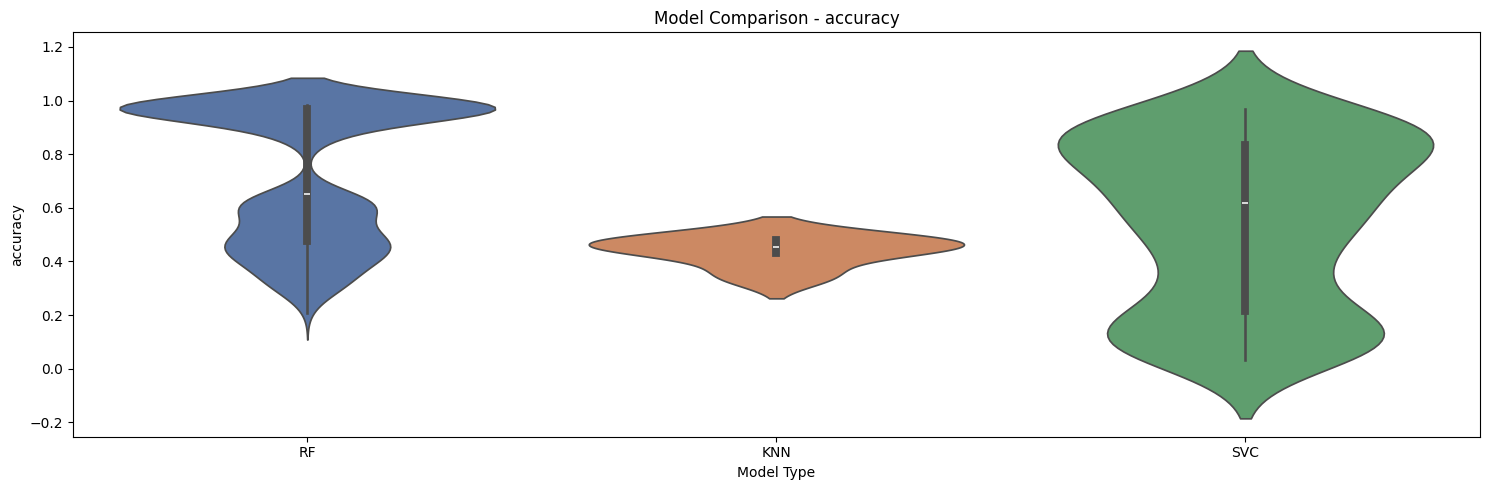


Model Comparison Statistics

Metric: accuracy

Summary Statistics:
                mean       std  count
model_type                           
KNN         0.439000  0.056943      5
RF          0.717231  0.254123   3388
SVC         0.543061  0.313280    204


ValueError: Unequal N in friedmanchisquare.  Aborting.

In [77]:
# Compare all models across datasets
analyze_model_comparison(
    all_model_data,
    models=['RF', 'KNN', 'SVC'],
    metrics=['accuracy'],
    statistical_test='friedman'  # Non-parametric test for multiple models
)

# Dataset characteristic impact
analyze_dataset_impact(
    all_model_data,
    characteristics=['n_samples', 'n_features', 'class_balance'],
    models=['RF', 'KNN', 'SVC']
)

In [73]:
def create_advanced_parameter_plot(df, model_type, param, metric='accuracy'):
    """
    Create an advanced visualization for parameter analysis
    """
    plt.figure(figsize=(12, 6))
    
    # Main parameter vs metric plot
    sns.boxplot(data=df[df['model_type'] == model_type], 
                x=param, 
                y=metric, 
                color='lightblue')
    
    # Add trend line
    sns.regplot(data=df[df['model_type'] == model_type],
                x=param,
                y=metric,
                scatter=False,
                color='red')
    
    # Add standard deviation bands
    param_stats = df[df['model_type'] == model_type].groupby(param)[metric].agg(['mean', 'std'])
    plt.fill_between(param_stats.index,
                     param_stats['mean'] - param_stats['std'],
                     param_stats['mean'] + param_stats['std'],
                     alpha=0.2)
    
    plt.title(f'Impact of {param} on {metric} for {model_type}')
    plt.tight_layout()
    plt.show()

# Statistical Summary Function
def print_statistical_summary(df, model_type, param, metric='accuracy'):
    """
    Print comprehensive statistical summary
    """
    model_data = df[df['model_type'] == model_type]
    
    print(f"Statistical Summary for {model_type} - {param}")
    print("="*50)
    
    # Basic statistics
    stats = model_data.groupby(param)[metric].agg(['mean', 'std', 'count'])
    print("\nParameter-wise statistics:")
    print(stats)
    
    # Statistical tests
    if model_data[param].nunique() > 2:
        # ANOVA for more than 2 groups
        f_stat, p_val = stats.f_oneway(*[group[metric].values 
                                       for name, group in model_data.groupby(param)])
        print("\nANOVA Test:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_val:.4f}")
    else:
        # T-test for 2 groups
        group1, group2 = [group[metric].values 
                         for name, group in model_data.groupby(param)]
        t_stat, p_val = stats.ttest_ind(group1, group2)
        print("\nT-test:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_val:.4f}")